## MACHINE LEARNING - Regression

#### **Dataset**: Boston Housing
#### **Model**: Multi Linear Regression (MLR)
#### **Problem Statement: "What is the most accurate model in predicting future boston housing median value"**
#### **Primary Objectives**:
1. To achieve a complete and robust model for MLR
2. Discover the application of the following concepts: 
>i) **MLR** through StatsModel, Sklearn, 
>ii) **Learning Curve** through StatsModel, 
>iii) **Lasso Regression (L1 Regularization)** through Sklearn
>iv) **Influential Points** removal with Statsmodel
>v) **Interaction Terms** creation
3. Discover the use of some handy-dandy python functions:
>i) **GridSearchCV**,
>ii) **LassoCV**
4. Gain experience in testing L.I.N.E. assumptions in Regression
>i) Know the **types of residual plots** to check,
>ii) How to **check for Normality** in Residuals

#### **Secondary Objectives**:
1. To determine the differences in variables with feature scaling (Standardization, Normalization) vs the absence of feature scaling

***


## i) Importing of Needed Libraries

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## ii) Data Exploration

In [2]:
# loading of the boston dataset

boston = datasets.load_boston()

In [3]:
# loaded data is not in the ideal form that we want. It's presently as a "bunch"

type(boston)

sklearn.utils.Bunch

In [4]:
# Conversion of the data to an actual dataset

X = pd.DataFrame(boston.data, columns = boston.feature_names)
X.head()

# Notice that we're still missing the Y

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
# Conversion of the data to an actual dataset

y = pd.DataFrame(boston.target, columns = ['MEDV']) # columns argument must be passed with a list
y.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [6]:
# Creating the full dataframe of the boston housing data sets.
# dependent variable: MEDV - the median value of owner-occupied homes in thousand USDs

data_boston = X.copy() #making a copy to avoid any carried forward amendments
data_boston['MEDV'] = y['MEDV']
data_boston.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [8]:
# Checking for shape
print('The shape of Boston Dataset is {}'.format(data_boston.shape))
print('**********************************')

# Checking for NA values
print(data_boston.info())

# observation: there is no missing values

The shape of Boston Dataset is (506, 14)
**********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB
None


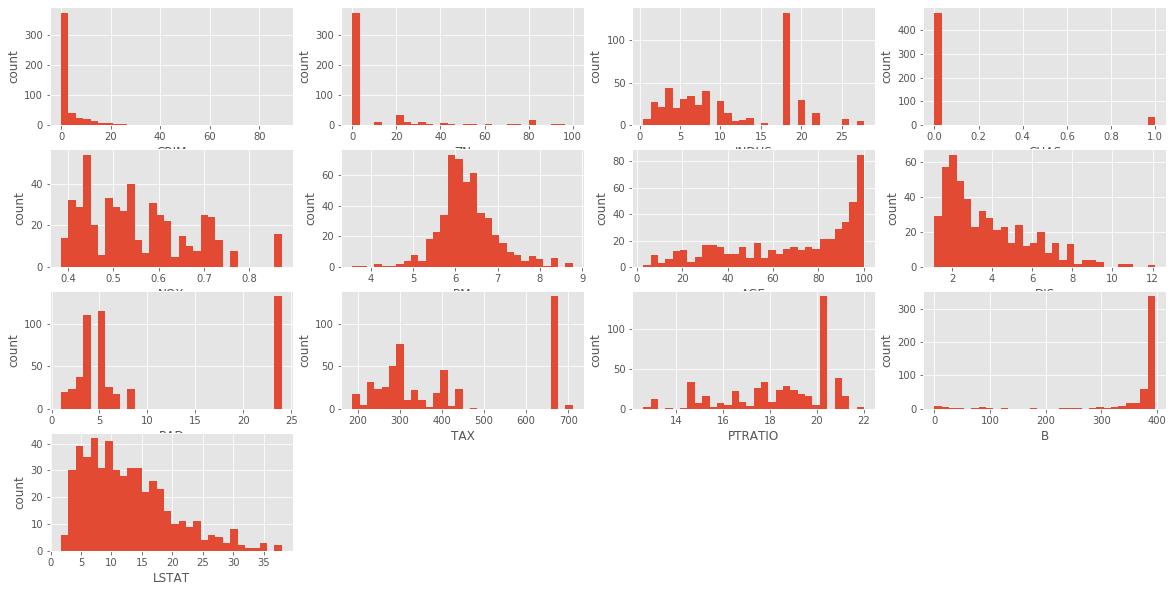

In [9]:
# Checking distribution of data
plt.figure(figsize = (20,10)) #sets the size of the overall plot

# creating a loop that would plot distribution
i = 1

for feature in list(boston.feature_names):
    plt.subplot(4,4,i)
    data_boston[feature].plot.hist(bins = 30) #put bins to 30 for clearer depiction of distribution
    plt.xlabel(feature)
    plt.ylabel("count")
    i+=1
    

Observations of the above plots:

1) CRIM: Strong Right Skew [Criminal activity is low in boston during that time period]

2) ZN: Strong Right Skew [residential land zone is little]

3) INDUS: Bimodal Distribution [Boston houses could have 2 clusters given the consistent mode of distance range to industry areas]

4) CHAS: CATEGORICAL VARIABLE (a dummy variable)

5) NOX: Weak Right Skew [While weak skew, majority hovers at about 0.6 which is fairly high.]

6) RM: Normal, looks to have a small std as it's graph is narrow [Boston houses typically have about 6 rooms per house in that time period.]

7) AGE: Strong Left Skew [Houses tend to be occupied very frequently, given the high values close to 100 which is in percentage]

8) DIS: Right Skew [These boston suburbs are rather near the boston employment centres. As there is only one peak, it could mean that these employments are well distributed near majority of these suburbs. HOwever, as it is average, there's no certainty that ALL 5 employment centres are placed evenly.]

9) RAD: Bimodal Distribution [The 2 peaks further highlight how the chances of 2 clusters can be present.]

10) TAX: Bimodal Distributin [It might suggest that one cluster of houses may tend to be more highly valued than another cluster.]

11) PTRATIO: Weak Left Skew [Given the left skew in pupil teacher ratio, it could mean that there are more suburbs with too little teachers. ]

12) B: Strong Left Skew [These suburbs have a high proportion of blacks in town]

13) LSTAT: Weak Right Skew [majority of these suburb residents are of lower status in the population]

### Added Observations:
1. We have 1 categorical X, and 12 continuous X. 
2. Each Xs range is different. Widest is 'TAX'. Smallest is nitrogen oxide concentration - 'NOX'.


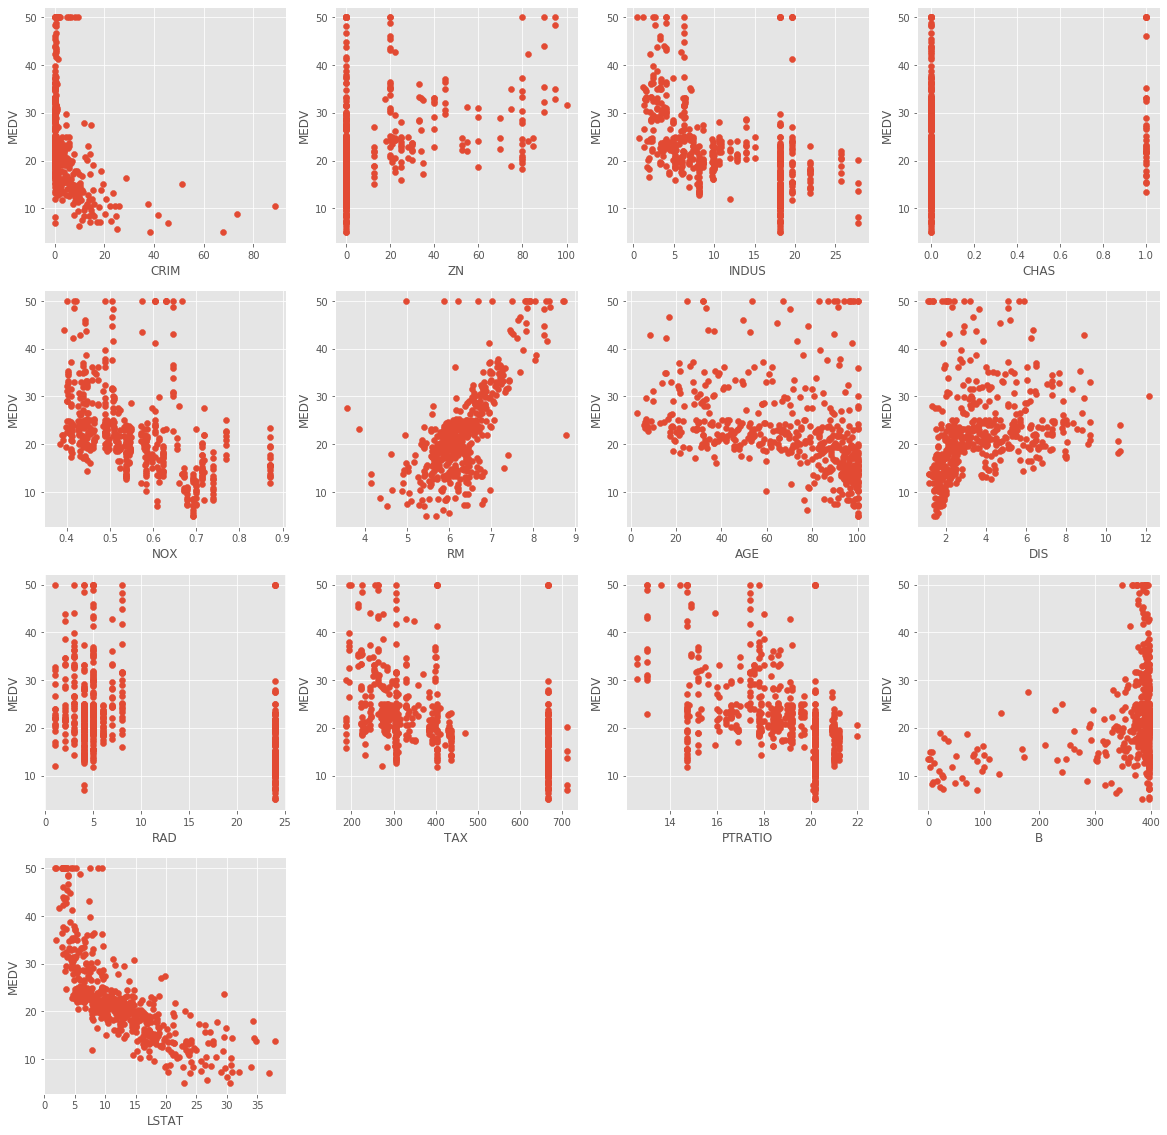

In [10]:
# plotting of x variables, against the y variable

plt.figure(figsize = (20,20))

# creating a loop for plotting
i = 1
for variable in list(boston.feature_names):
    plt.subplot(4,4,i)
    plt.scatter(x = variable, y = 'MEDV', data = data_boston)
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1

In [11]:
# dropped 'CHAS' for the time being as it is a categorical value

data_boston_noCHAS = data_boston.drop(['CHAS'], axis = 1)
data_boston_noCHAS.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [12]:
data_boston_noCHAS_corr = data_boston_noCHAS.corr(method = 'pearson').iloc[:,:-1]
data_boston_noCHAS_corr

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
CRIM     1.000000 -0.200469  0.406583  0.420972 -0.219247  0.352734 -0.379670   
ZN      -0.200469  1.000000 -0.533828 -0.516604  0.311991 -0.569537  0.664408   
INDUS    0.406583 -0.533828  1.000000  0.763651 -0.391676  0.644779 -0.708027   
NOX      0.420972 -0.516604  0.763651  1.000000 -0.302188  0.731470 -0.769230   
RM      -0.219247  0.311991 -0.391676 -0.302188  1.000000 -0.240265  0.205246   
AGE      0.352734 -0.569537  0.644779  0.731470 -0.240265  1.000000 -0.747881   
DIS     -0.379670  0.664408 -0.708027 -0.769230  0.205246 -0.747881  1.000000   
RAD      0.625505 -0.311948  0.595129  0.611441 -0.209847  0.456022 -0.494588   
TAX      0.582764 -0.314563  0.720760  0.668023 -0.292048  0.506456 -0.534432   
PTRATIO  0.289946 -0.391679  0.383248  0.188933 -0.355501  0.261515 -0.232471   
B       -0.385064  0.175520 -0.356977 -0.380051  0.128069 -0.273534  0.291512   
LSTAT    0.455621 -0.412995  0.603800  0.590879 -0.613808  0.602339 -0.496996   
MEDV    -0.388305  0.360445 -0.483725 -0.427321  0.695360 -0.376955  0.249929   

              RAD       TAX   PTRATIO         B     LSTAT  
CRIM     0.625505  0.582764  0.289946 -0.385064  0.455621  
ZN      -0.311948 -0.314563 -0.391679  0.175520 -0.412995  
INDUS    0.595129  0.720760  0.383248 -0.356977  0.603800  
NOX      0.611441  0.668023  0.188933 -0.380051  0.590879  
RM      -0.209847 -0.292048 -0.355501  0.128069 -0.613808  
AGE      0.456022  0.506456  0.261515 -0.273534  0.602339  
DIS     -0.494588 -0.534432 -0.232471  0.291512 -0.496996  
RAD      1.000000  0.910228  0.464741 -0.444413  0.488676  
TAX      0.910228  1.000000  0.460853 -0.441808  0.543993  
PTRATIO  0.464741  0.460853  1.000000 -0.177383  0.374044  
B       -0.444413 -0.441808 -0.177383  1.000000 -0.366087  
LSTAT    0.488676  0.543993  0.374044 -0.366087  1.000000  
MEDV    -0.381626 -0.468536 -0.507787  0.333461 -0.737663

In [13]:
X_noCHAS = X.copy()
X_noCHAS = X_noCHAS.drop(['CHAS'], axis = 1)

In [14]:
# Deriving VIF of variables. VIF helps to identify variables that are strongly correlated with other predictor variables only. 

## Creating a copy of X dataframe
X_vif = X_noCHAS.copy()

## Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Get variables for which to compute VIF and add intercept term
# X = data[['cement_component', 'furnace_slag', 'fly_ash','water_component', 'superplasticizer', 'coarse_aggregate','fine_aggregate', 'age']]
X_vif['Intercept'] = 1

## Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

## View results using print
print(vif)

## Observation: There is high Multicollinearity (VIF > 5) found in ['TAX', 'RAD'].

    variables         VIF
0        CRIM    1.787705
1          ZN    2.298257
2       INDUS    3.949246
3         NOX    4.388775
4          RM    1.931865
5         AGE    3.092832
6         DIS    3.954961
7         RAD    7.397844
8         TAX    8.876233
9     PTRATIO    1.783302
10          B    1.344971
11      LSTAT    2.931101
12  Intercept  584.833043


In [15]:
# investigating the ['RAD','TAX'] variables high VIF values

data_boston_noCHAS_corr.loc[['RAD','TAX'],:]

# Observation: Seems like TAX and RAD are strongly correlated with one another with 0.910228!! So, which to drop? 
## Decided to drop TAX since people are more likely to lie in it!

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
RAD  0.625505 -0.311948  0.595129  0.611441 -0.209847  0.456022 -0.494588   
TAX  0.582764 -0.314563  0.720760  0.668023 -0.292048  0.506456 -0.534432   

          RAD       TAX   PTRATIO         B     LSTAT  
RAD  1.000000  0.910228  0.464741 -0.444413  0.488676  
TAX  0.910228  1.000000  0.460853 -0.441808  0.543993

In [16]:
# Deriving VIF of variables with the removal of 'TAX'

## Creating a copy of X dataframe
X_vif = X_noCHAS.copy()

## Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Get variables for which to compute VIF and add intercept term
X_vif = X_vif.drop(['TAX'], axis = 1)
X_vif['Intercept'] = 1

## Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

## View results using print
print(vif)

## Observation: Upon ['TAX'] removal, all variables achieve a VIF <= 5, which indicates a fairly good absence of multicollinearity.

    variables         VIF
0        CRIM    1.787644
1          ZN    2.183888
2       INDUS    3.215917
3         NOX    4.366592
4          RM    1.919907
5         AGE    3.091050
6         DIS    3.953126
7         RAD    2.836382
8     PTRATIO    1.769541
9           B    1.343493
10      LSTAT    2.930904
11  Intercept  578.148891


In [17]:
# Before proceeding to creating a 1st pass MLR model, let's drop ['CHAS','TAX'] first.
## Why CHAS? It is not even high in VIF! Well, CHAS is a categorical predictor. 
## At this point of time, you haven't yet understood how categorical predictors 
## would behave in a regression model. Hence, you excluded it for now!

data_boston_noCHASnoTAX = data_boston.copy()
data_boston_noCHASnoTAX = data_boston_noCHASnoTAX.drop(['CHAS','TAX'], axis = 1)
data_boston_noCHASnoTAX.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD  PTRATIO       B  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0     15.3  396.90   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0     17.8  396.90   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0     17.8  392.83   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0     18.7  394.63   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

## iii) Building a 1st Pass Model
***

In [18]:
# Creating a training set of X_train, X_test, y_train and y_test
# Recall that the idea here, is to simply create a first pass MLR model

from sklearn.model_selection import train_test_split

X = data_boston_noCHASnoTAX.drop(['MEDV'], axis = 1)
y = data_boston_noCHASnoTAX['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [19]:
X_test.shape

(102, 11)

#########################################################################################################

#### **Learning Bubble: Why use StatsModel and not sklearn?** Because statsmodel gives more detailed results such as the p-value of the t-statistic of each slope which answers this question - "is there sufficient evidence to conclude that the variable is significantly related to the dependent variable after other predictors have been taken into account?"

If p-value > 0.05 (a typical level of significance), then variable is **not** significantly related to the dependent variable after other presictors have been taken into account.
**Else, the variable is significantly related**!

#########################################################################################################

In [20]:
# Creating a first pass MLR model with StatsModel

import statsmodels.api as smf

Xs = X_train
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     97.21
Date:                Sun, 24 May 2020   Prob (F-statistic):          1.03e-104
Time:                        12:36:20   Log-Likelihood:                -1199.7
No. Observations:                 404   AIC:                             2423.
Df Residuals:                     392   BIC:                             2471.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8016      5.780      5.329      0.0

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### Observation: Now, AGE and INDUS have been reflected as having no relationship with the dependent variable (as observed from the P > |t| values, it's greater than 0.05 which indicates that it is no different from a slope that is 0. 

##### Action: We will drop AGE first, and see if the 'INDUS' variable improves in its significance. 

In [21]:
X = data_boston_noCHASnoTAX.drop(['MEDV'], axis = 1)
y = data_boston_noCHASnoTAX['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['AGE','INDUS','ZN'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 24 May 2020   Prob (F-statistic):          7.49e-107
Time:                        12:36:20   Log-Likelihood:                -1202.1
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     395   BIC:                             2458.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5685      5.758      5.309      0.0

##### Observation: After dropping age, INDUS still had a p-value score more than 0.05. Hence, INDUS was also removed. Upon removing AGE and INDUS, ZN still had a p-value score more than 0.05 as well. Hence, ['AGE','INDUS','ZN'] have been reflected as having no relationship with the dependent variable (as observed from the P > |t| values; greater than 0.05 which indicates that the slope of that variable is no different from being equalled to 0. 

##### DECISION: We have dropped AGE, INDUS and ZN. Now, all variables are identified to have a significant slope in this MLR.

In [22]:
X_test_mod = X_test.copy()
X_test_mod = X_test_mod.drop(['AGE','INDUS','ZN'], axis = 1)

predict_ = est2.predict(smf.add_constant(X_test_mod))
predict_

427    13.598764
260    34.919307
115    21.490776
398     6.456198
131    20.270778
         ...    
409    20.067619
241    23.500599
65     28.807565
386     5.505598
132    20.932176
Length: 102, dtype: float64

In [23]:
error = predict_ - y_test
error

427    2.698764
260    1.119307
115    3.190776
398    1.456198
131    0.670778
         ...   
409   -7.432381
241    3.400599
65     5.307565
386   -4.994402
132   -2.067824
Length: 102, dtype: float64


#### Residual Plots of 1st Pass Model
***

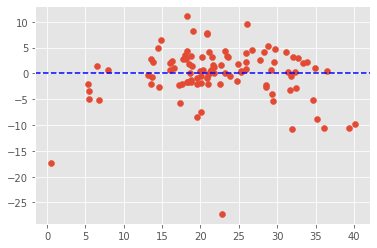

In [24]:
# Plot 1: Predicted against Residuals, with X_test Data

plt.scatter(x = predict_, y = error)
plt.axhline(y=0, color='b', linestyle='--')

# observations: The spread is not close to 0, but the spread of the residuals is approx. constant. There is also an excessively outlying point. 
# While the error range lies just +/- 10 units, it is actually quite okay. This determination of 'ok' is dependent on what the y property is - median value of owner-occupied homes in $1000s.
# In this case, it can be fairly big - it's saying the house error lies between +/- $10000. 

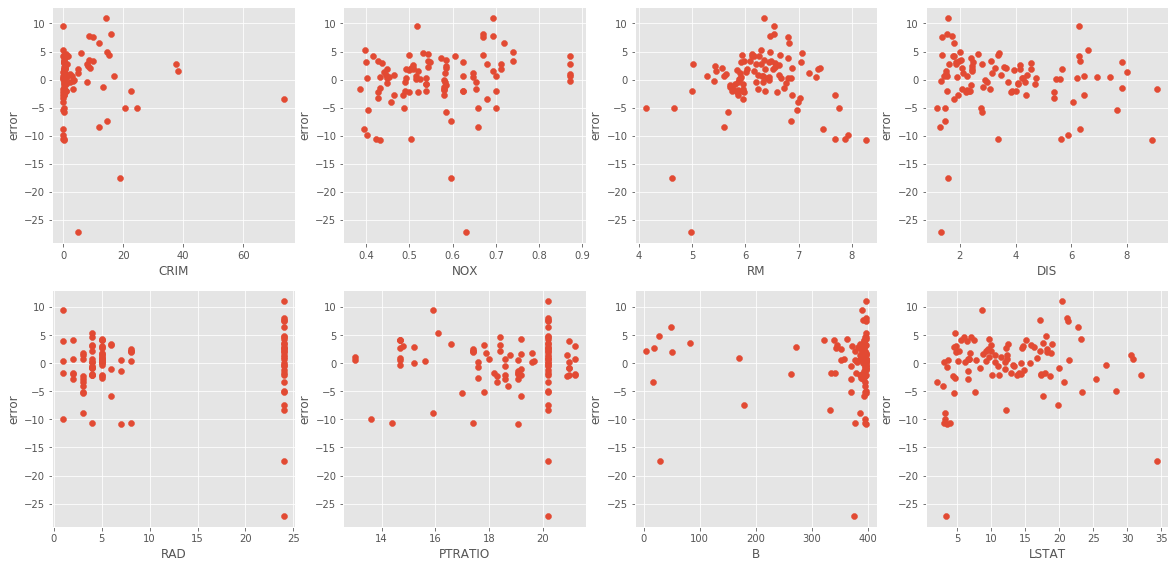

In [25]:
# Plot 2: Residuals against the Predictors used in 1st Pass Model, with X_test Data

plt.figure(figsize = (20,20))

i = 1

for variable in (X_test_mod.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = X_test_mod[variable], y = error)
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1
    
# observations: the L is not observed in ['CRIM','RAD','B'].

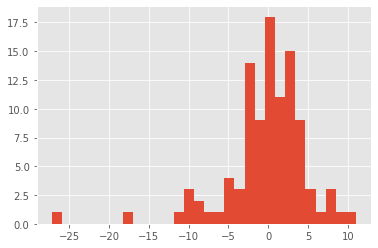

In [26]:
# Plot 3: Residuals Histogram

error.hist(bins = 30)

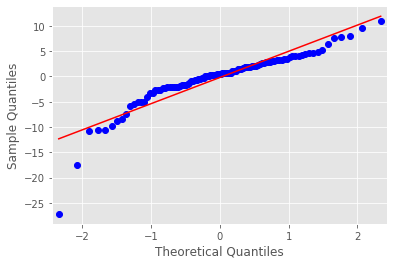

In [27]:
# Plot 4: A QQ plot of the Residuals to determine their normality visually
## The line repressents "a standardized line, the expected order statistics are scaled 
## by the standard deviation of the given sample and have the mean added 
## to them" (according to documentation)

from statsmodels.graphics.gofplots import qqplot

qqplot(error, line='s')
plt.show()

In [28]:
# Plot 4 Supporting Test: 1 of 3 available Normality Test as suggested by MachineLearningMastery

# importing Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(error)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.871, p=0.000
Sample does not look Gaussian (reject H0)


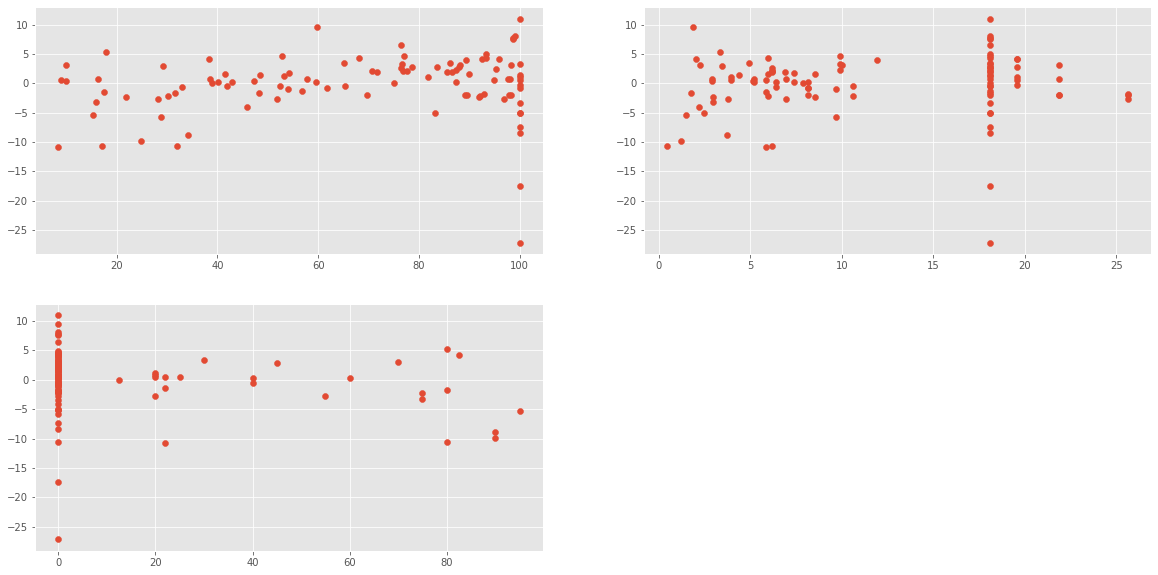

In [29]:
# Plot 5: Residuals against Omitted Variables of the 1st Pass Model - ['AGE','INDUS','ZN']
## This last plot is intended to determine if any omitted variable 
## should be included back into the model. This is determined if a strong
## linear or non-linear pattern is observed. 

plt.figure(figsize = (20,10))

i = 1

for variable in ['AGE','INDUS','ZN']:
    plt.subplot(2,2,i)
    plt.scatter(x = X_test[variable], y = error)
    i += 1
    
# observations: as there is no linear nor non-linear sort of r/s
# between residuals and the omitted variables, we will not add these omitted
# variables into the model 

### Conclusion of first pass model:

Based off of the residual and error plots, the linearity assumption is not achieved with ['CRIM','RAD','B']. Hence, we might wanna transform them! 

In addition, based off the graphs of error against predictor variables that were not ommitted, we observe that there seem to be some outlier points and some high leverage points. For instance, 
1. All eight grahs have a point that is not following its typical trend. Could be infered as an outlier.
2. ['CRIM','RAD','B'] are the obvious ones with no linearity.


### Data Transformation
***

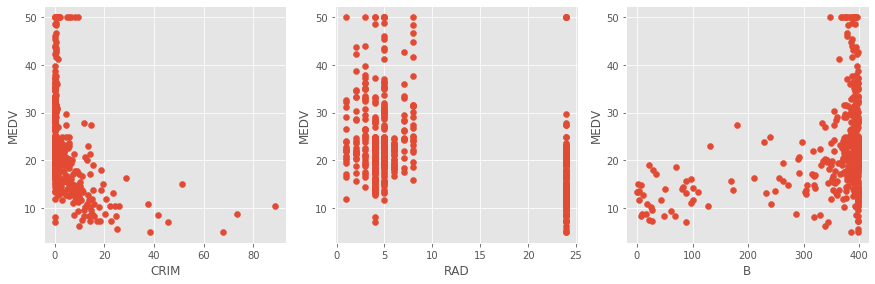

In [30]:
# Investigating the reason why ['CRIM','RAD','B'] is not linear.

plt.figure(figsize = (20,20))

# creating a loop for plotting
i = 1
for variable in ['CRIM','RAD','B']:
    plt.subplot(4,4,i)
    plt.scatter(x = data_boston[variable], y = data_boston['MEDV'])
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1

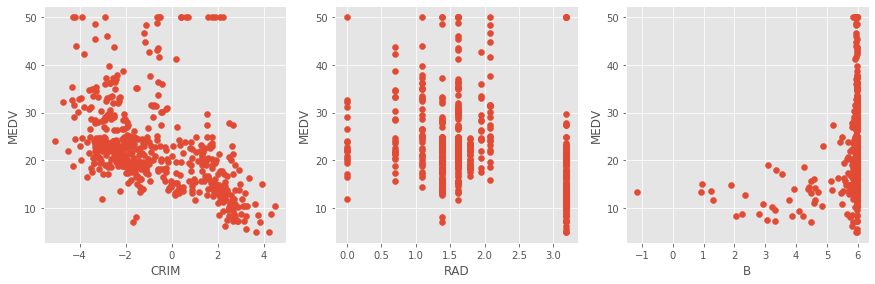

In [31]:
# an attempt to see if a transformation would improve the linearity of the above 3 graphs

plt.figure(figsize = (20,20))

# creating a loop for plotting
i = 1
for variable in ['CRIM','RAD','B']:
    plt.subplot(4,4,i)
    plt.scatter(x = np.log(data_boston[variable]), y = data_boston['MEDV'])
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1
    
## observation: The transformation did help with CRIM and RAD. But not B.

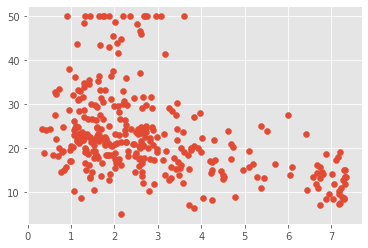

In [32]:
# random test for the ['B']

plt.scatter(x = (395-data_boston['B'])**(1/3), y = data_boston['MEDV'])

### Trouble: How to make sense of the left-skew transformation?

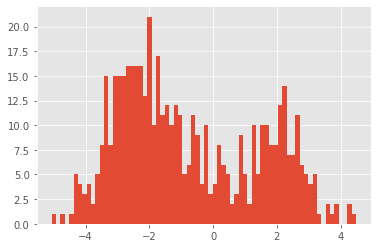

In [33]:
# plotting out histogram for the CRIM data

(np.log(data_boston['CRIM'])).hist(bins = 70)

In [34]:
# The addition of 2 sets of transformed data to ensure linearity with our model.

data_boston_updated = data_boston.copy()
data_boston_updated['lnCRIM'] = np.log(data_boston_updated['CRIM'])
data_boston_updated['lnRAD'] = np.log(data_boston_updated['RAD'])
data_boston_updated

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV    lnCRIM     lnRAD  
0       15.3  396.90   4.98  24.0 -5.064036  0.000000  
1       17.8  396.90   9.14  21.6 -3.600502  0.693147  
2       17.8  392.83   4.03  34.7 -3.601235  0.693147  
3       18.7  394.63   2.94  33.4 -3.430523  1.098612  
4       18.7  396.90   5.33  36.2 -2.672924  1.098612  
..       ...     ...    ...   ...       ...       ...  
501     21.0  391.99   9.67  22.4 -2.770511  0.000000  
502     21.0  396.90   9.08  20.6 -3.095111  0.000000  
503     21.0  396.90   5.64  23.9 -2.800824  0.000000  
504     21.0  393.45   6.48  22.0 -2.211009  0.000000  
505     21.0  396.90   7.88  11.9 -3.048922  0.000000  

[506 rows x 16 columns]

In [35]:
X = data_boston_noCHASnoTAX.drop(['MEDV'], axis = 1)
y = data_boston_noCHASnoTAX['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['AGE','INDUS','ZN'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 24 May 2020   Prob (F-statistic):          7.49e-107
Time:                        12:36:25   Log-Likelihood:                -1202.1
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     395   BIC:                             2458.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5685      5.758      5.309      0.0

In [36]:
X = data_boston_updated.drop(['MEDV','CHAS','TAX'], axis = 1)
y = data_boston_updated['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['AGE','INDUS','ZN','CRIM','RAD'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 24 May 2020   Prob (F-statistic):          1.41e-105
Time:                        12:36:25   Log-Likelihood:                -1205.1
No. Observations:                 404   AIC:                             2428.
Df Residuals:                     395   BIC:                             2464.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4190      5.840      5.209      0.0

In [37]:
X = data_boston_updated.drop(['MEDV','CHAS','TAX'], axis = 1)
y = data_boston_updated['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['AGE','INDUS','ZN','CRIM','RAD','B','lnCRIM','lnRAD'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 24 May 2020   Prob (F-statistic):          2.84e-105
Time:                        12:36:25   Log-Likelihood:                -1213.9
No. Observations:                 404   AIC:                             2440.
Df Residuals:                     398   BIC:                             2464.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7493      5.057      6.674      0.0

In [38]:
X_test_mod_1 = X_test.copy()
X_test_mod_1 = X_test_mod_1.drop(['AGE','INDUS','ZN','CRIM','RAD','B','lnCRIM','lnRAD'], axis = 1)

predict_1 = est2.predict(smf.add_constant(X_test_mod_1))
predict_1

427    19.505659
260    34.515965
115    21.455081
398     7.365147
131    20.646133
         ...    
409    21.088112
241    22.913964
65     28.794668
386     5.037910
132    21.428380
Length: 102, dtype: float64

In [39]:
error_1 = predict_1 - y_test

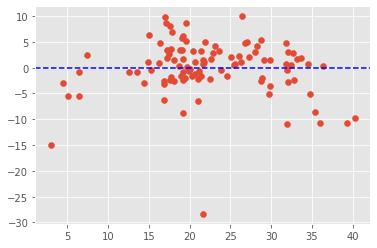

In [40]:
plt.scatter(x = predict_1, y = error_1)
plt.axhline(y=0, color='b', linestyle='--')

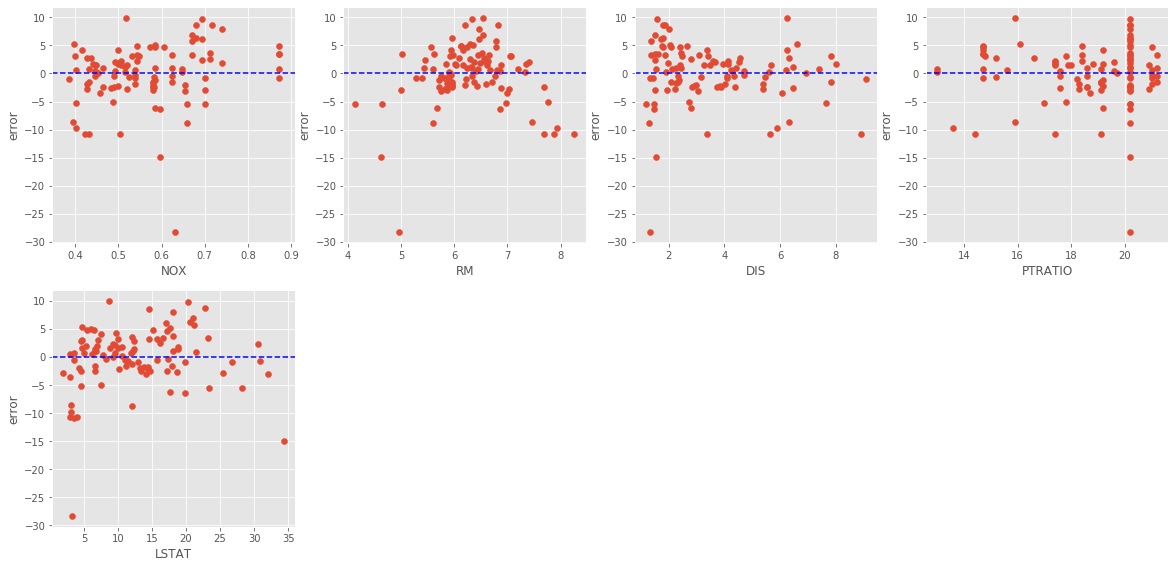

In [41]:
plt.figure(figsize = (20,20))

i = 1

for variable in (X_test_mod_1.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = X_test_mod_1[variable], y = error_1)
    plt.axhline(y=0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

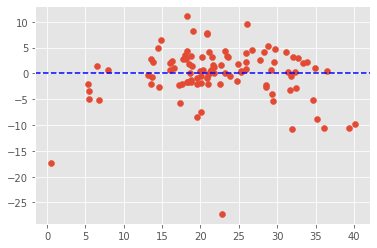

In [42]:
plt.scatter(x = predict_, y = error)
plt.axhline(y=0, color='b', linestyle='--')

In [43]:
# normality test for error_1
stat, p = shapiro(error_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.885, p=0.000
Sample does not look Gaussian (reject H0)


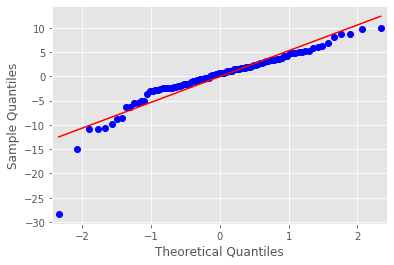

In [44]:
# qqplot for error_1

qqplot(error_1, line = 's')
plt.show()

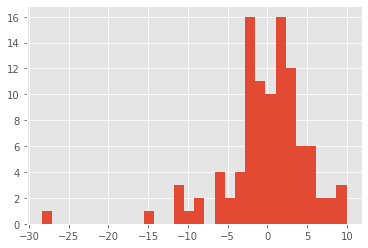

In [45]:
# distribution of error_1 

error_1.hist(bins = 30)

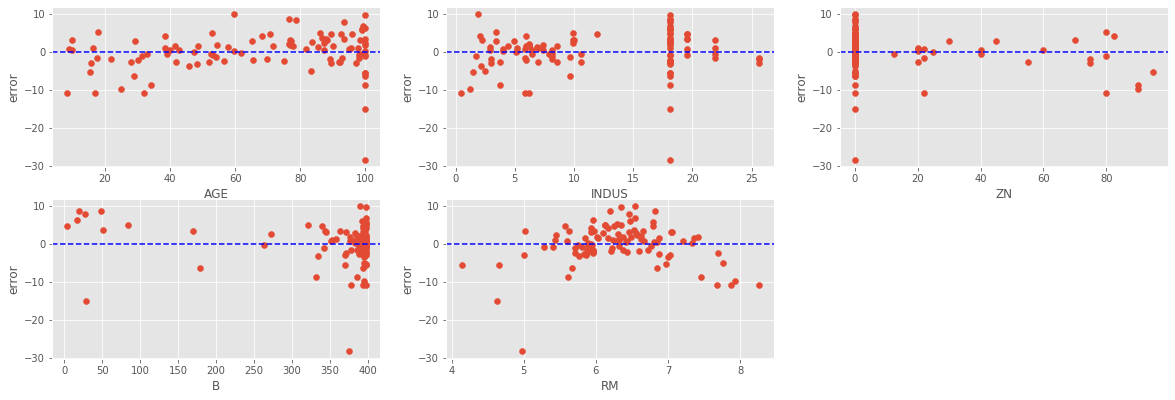

In [46]:
# this is the plot of error residuals against the omitted variables to determine if got 
# any strong linear or non-linear relationship.

plt.figure(figsize = (20,10))

i = 1

for variable in ['AGE','INDUS','ZN','B','RM']:
    plt.subplot(3,3,i)
    plt.scatter(x = X_test[variable], y = error_1)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1
    
# Observation: there seems to be a sort of relationship with RM. After values of 7, it leans to larger errors
# As error_1 = y^ - y, it means the predicted values are smaller than the actual y. 

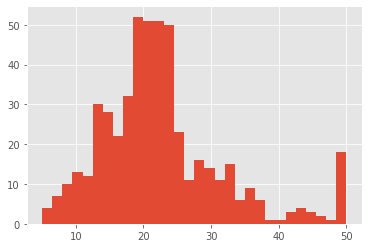

In [47]:
data_boston['MEDV'].hist(bins = 30)

### Detecting Unusual and Influential Data
Resources:
> 1. Mainly, python steps are gleaned from here: https://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/
2. Conceptually, we still took reference from Penn State University:
https://online.stat.psu.edu/stat501/lesson/11/11.2


In [48]:
data_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [49]:
data_boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [50]:
data_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

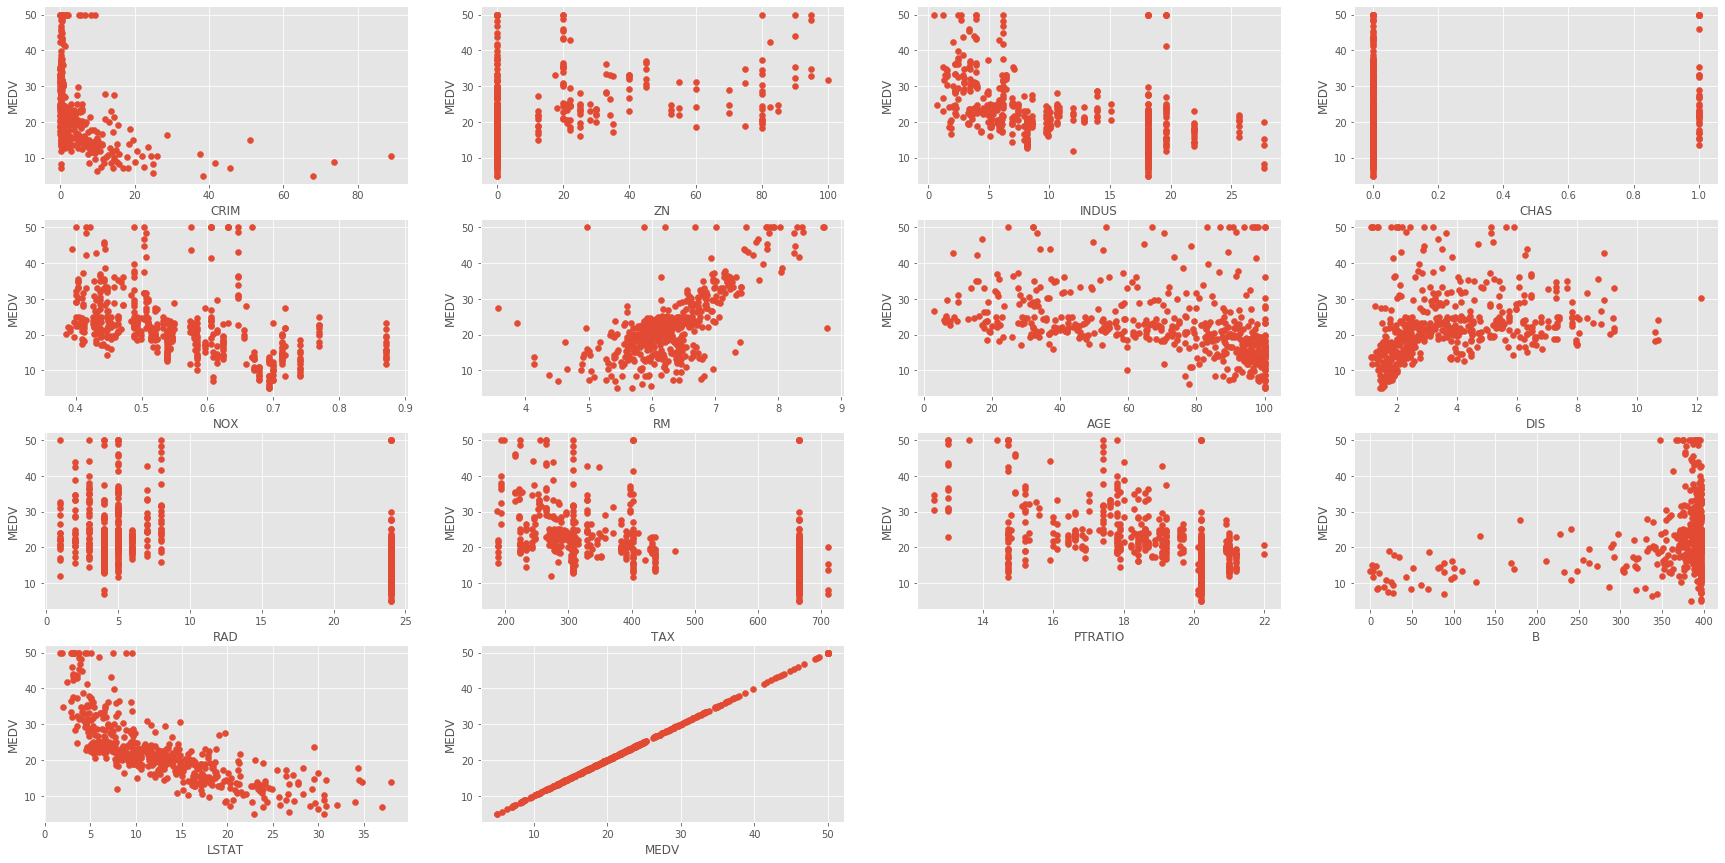

In [51]:
plt.figure(figsize = (30,15))

i = 1

for variable in list(data_boston.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = data_boston[variable], y = data_boston['MEDV'])
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1

In [52]:
X = data_boston_noCHASnoTAX.drop(['MEDV'], axis = 1)
y = data_boston_noCHASnoTAX['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['AGE','INDUS','ZN'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 24 May 2020   Prob (F-statistic):          7.49e-107
Time:                        12:36:29   Log-Likelihood:                -1202.1
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     395   BIC:                             2458.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5685      5.758      5.309      0.0

In [53]:
temp_X = data_boston_noCHASnoTAX.drop(['AGE','INDUS','ZN'], axis = 1)
temp_X.head()

CRIM    NOX     RM     DIS  RAD  PTRATIO       B  LSTAT  MEDV
0  0.00632  0.538  6.575  4.0900  1.0     15.3  396.90   4.98  24.0
1  0.02731  0.469  6.421  4.9671  2.0     17.8  396.90   9.14  21.6
2  0.02729  0.469  7.185  4.9671  2.0     17.8  392.83   4.03  34.7
3  0.03237  0.458  6.998  6.0622  3.0     18.7  394.63   2.94  33.4
4  0.06905  0.458  7.147  6.0622  3.0     18.7  396.90   5.33  36.2

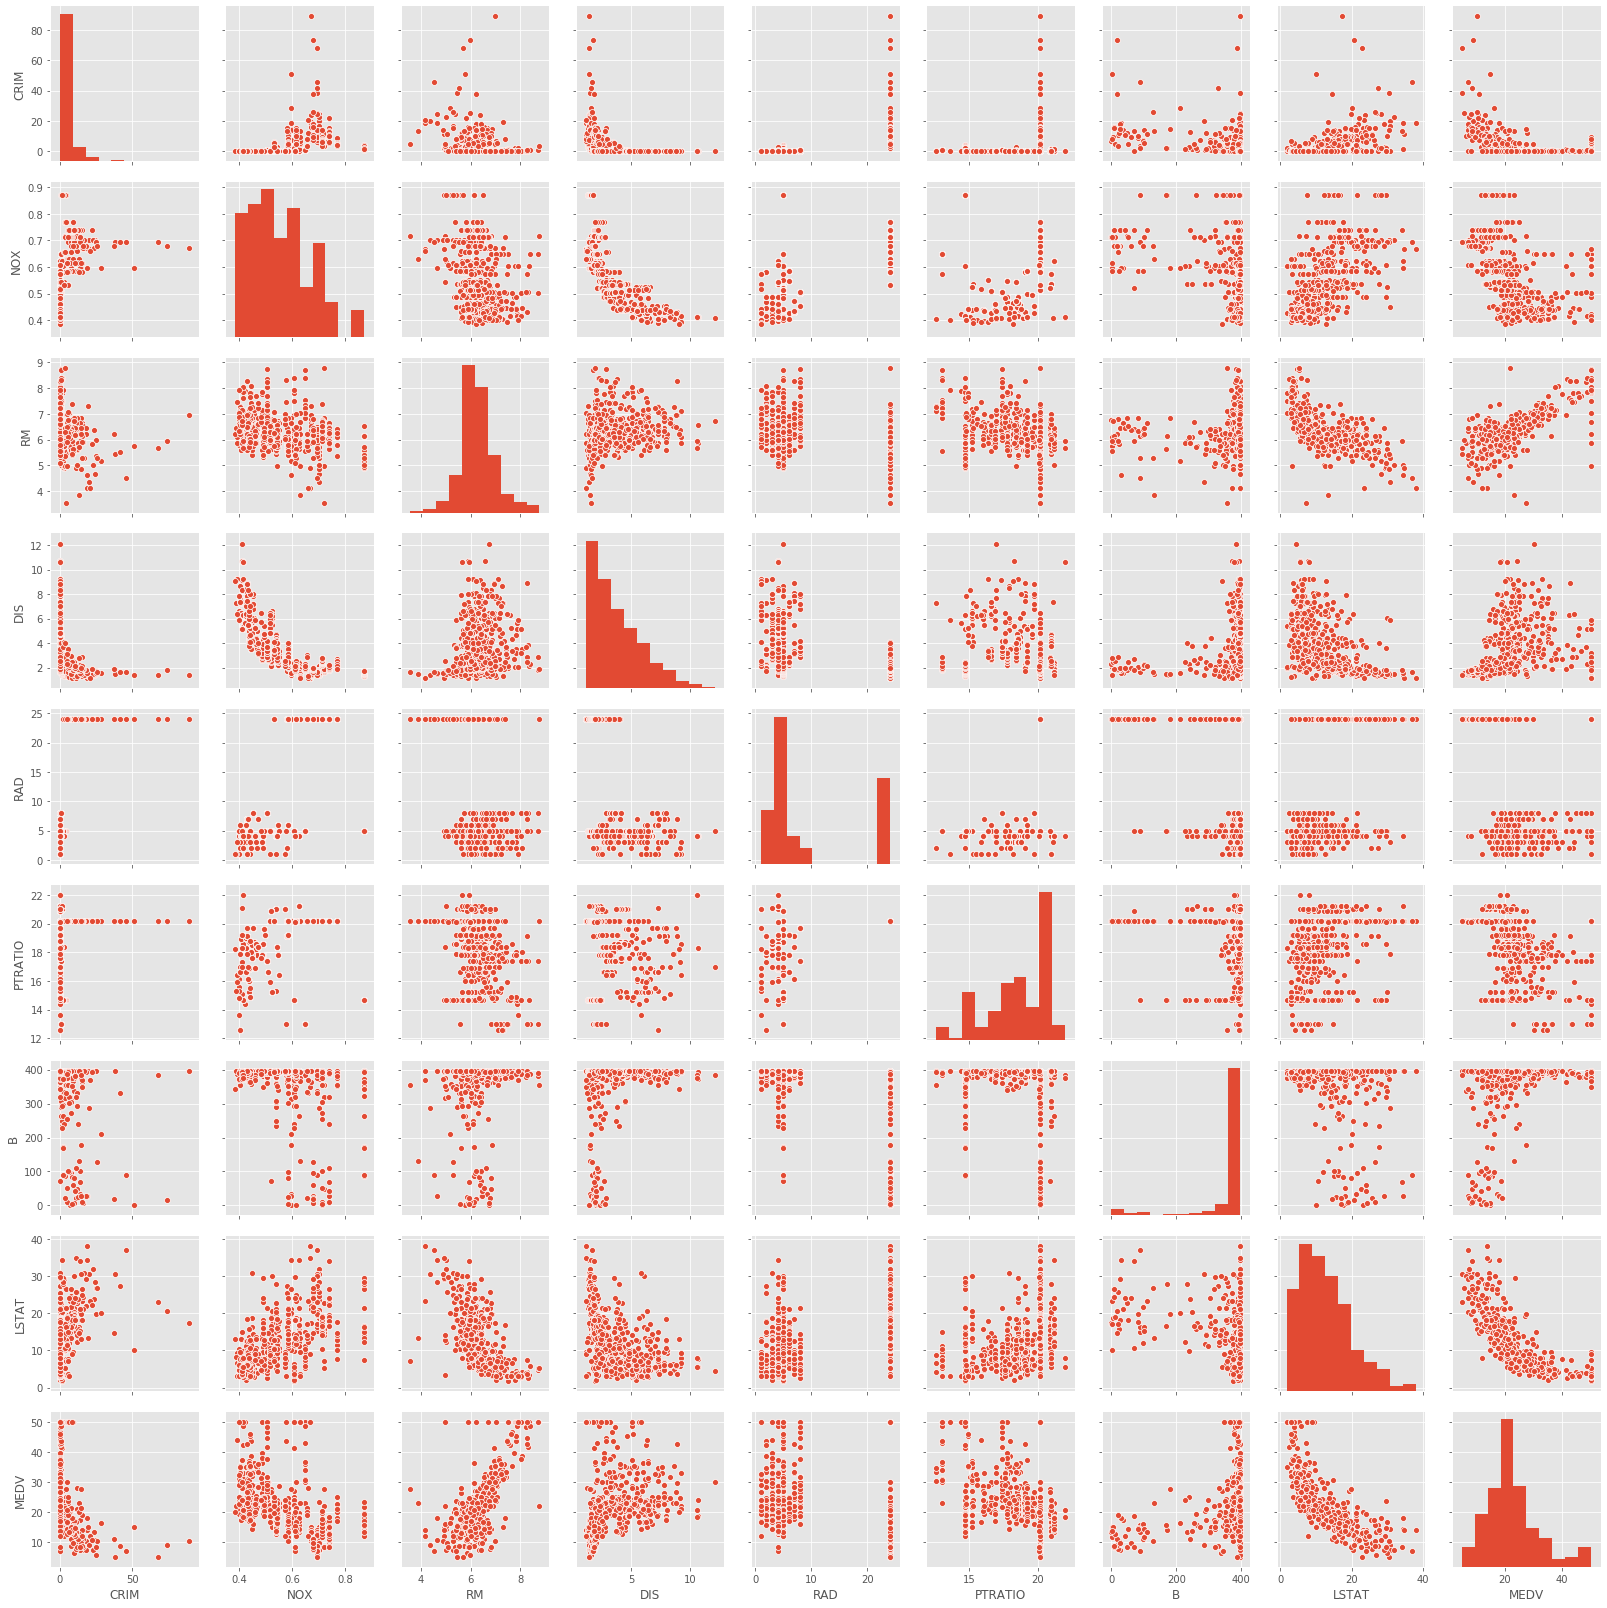

In [54]:
sns.pairplot(temp_X)

In [55]:
temp_X.index

RangeIndex(start=0, stop=506, step=1)

Text(0, 0.5, 'MEDV')

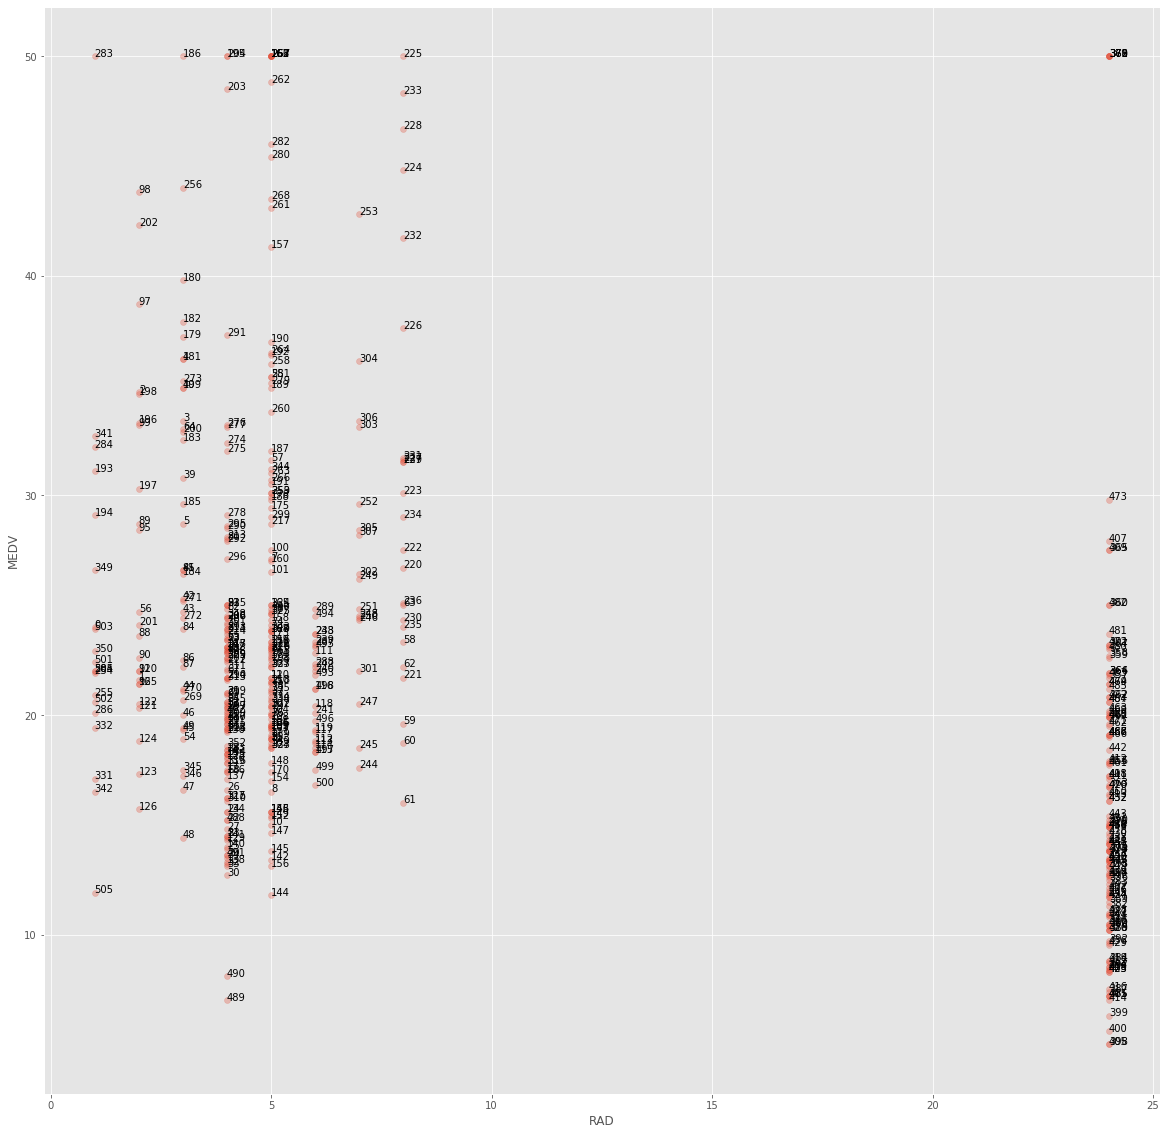

In [56]:
plt.figure(figsize = (20,20))

plt.scatter(temp_X['RAD'],temp_X['MEDV'], alpha = 0.3)

for i, index in enumerate(temp_X.index):
    plt.annotate(index, [temp_X.RAD[i] , temp_X.MEDV[i]])
    
plt.xlabel('RAD')
plt.ylabel('MEDV')

# observation: At the top right corner, there seems to be a number of points clustered.

Text(0, 0.5, 'MEDV')

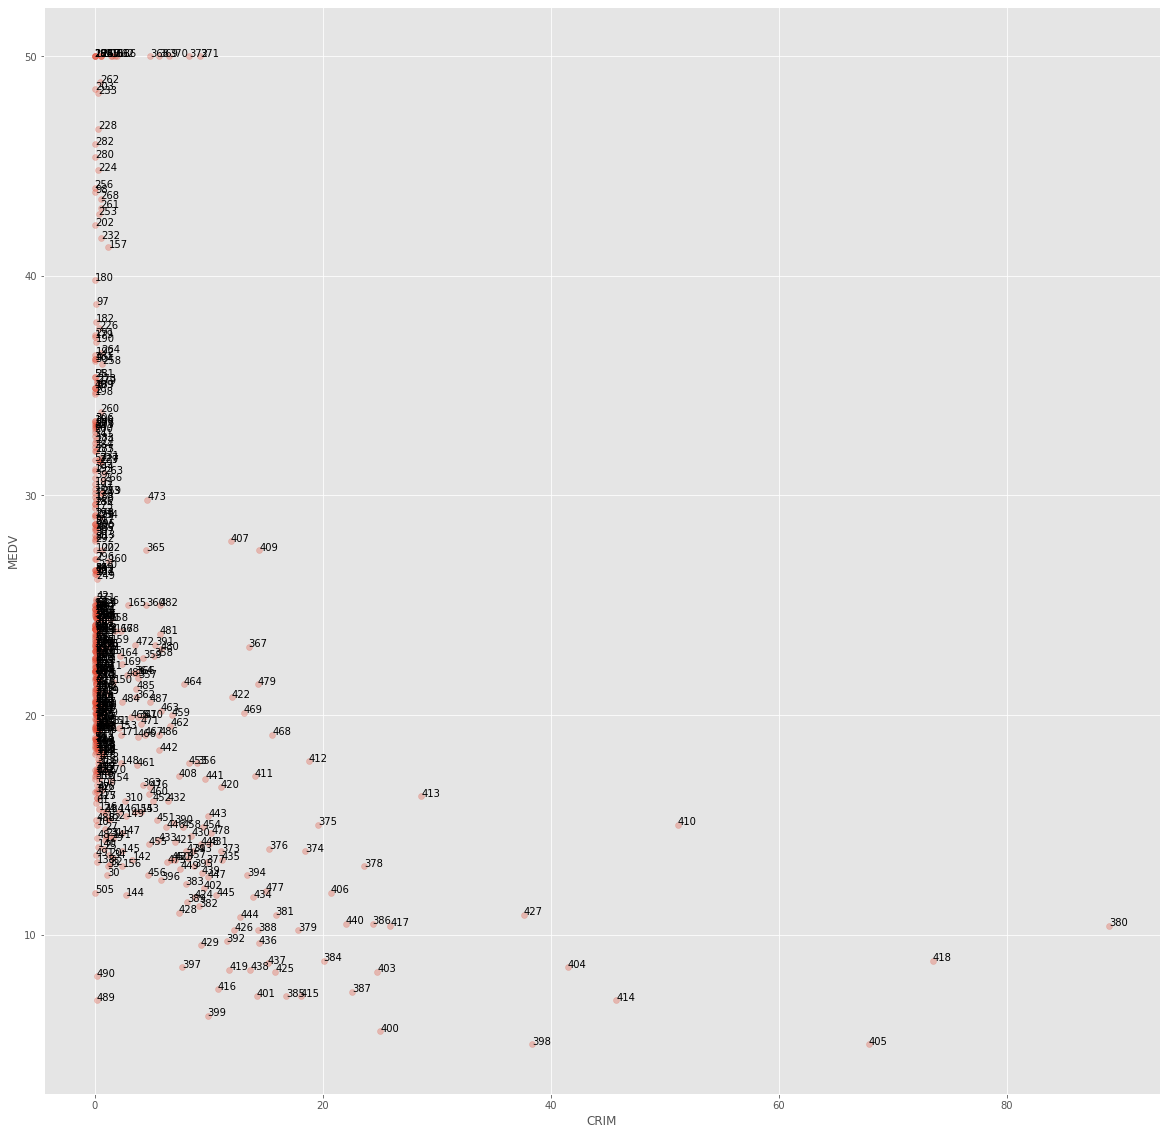

In [57]:
plt.figure(figsize = (20,20))

plt.scatter(temp_X['CRIM'],temp_X['MEDV'], alpha = 0.3)

for i, index in enumerate(temp_X.index):
    plt.annotate(index, [temp_X.CRIM[i] , temp_X.MEDV[i]])
    
plt.xlabel('CRIM')
plt.ylabel('MEDV')

# observation: Quite an unbalanced plot. However, worth noting that it was still significant in its slope

In [58]:
# doing up a OLS model for ALL the data points in the model
# but still dropping the columns of AGE, INDUS, and ZN

X = data_boston_noCHASnoTAX.drop(['MEDV'], axis = 1)
y = data_boston_noCHASnoTAX['MEDV']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X.copy()
Xs = Xs.drop(['AGE','INDUS','ZN'], axis = 1)
y = y.copy()
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sun, 24 May 2020   Prob (F-statistic):          1.19e-133
Time:                        12:36:49   Log-Likelihood:                -1514.6
No. Observations:                 506   AIC:                             3047.
Df Residuals:                     497   BIC:                             3085.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6917      5.180      6.891      0.0



Leverage v.s. Studentized Residuals


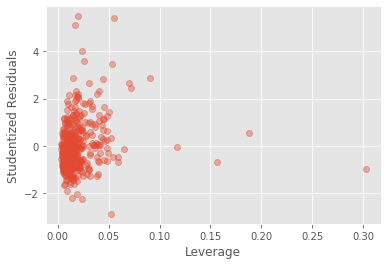

In [59]:
influence = est2.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print('\n')
print('Leverage v.s. Studentized Residuals')
sns.regplot(x = leverage, y = est2.resid_pearson, fit_reg = False, scatter_kws={'alpha':0.4})
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.show()

In [60]:
temp_X_res = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
temp_X_res = pd.concat([temp_X, temp_X_res], axis = 1)
temp_X_res.head()

CRIM    NOX     RM     DIS  RAD  PTRATIO       B  LSTAT  MEDV     cooks  \
0  0.00632  0.538  6.575  4.0900  1.0     15.3  396.90   4.98  24.0  0.002073   
1  0.02731  0.469  6.421  4.9671  2.0     17.8  396.90   9.14  21.6  0.000295   
2  0.02729  0.469  7.185  4.9671  2.0     17.8  392.83   4.03  34.7  0.000320   
3  0.03237  0.458  6.998  6.0622  3.0     18.7  394.63   2.94  33.4  0.000666   
4  0.06905  0.458  7.147  6.0622  3.0     18.7  396.90   5.33  36.2  0.002299   

     dffits  leverage  resid_student  
0 -0.136752  0.008801      -1.451278  
1 -0.051527  0.003684      -0.847388  
2  0.053593  0.006972       0.639625  
3  0.077385  0.008728       0.824697  
4  0.144033  0.008728       1.534974

In [61]:
temp_X_res['resid_student'].describe()

count    506.000000
mean       0.003229
std        1.013505
min       -2.985739
25%       -0.632158
50%       -0.116870
75%        0.388284
max        5.742714
Name: resid_student, dtype: float64

In [62]:
outliers_temp_X_res = list(temp_X_res[abs(temp_X_res['resid_student'])>3].index)
print(len(outliers_temp_X_res))
outliers_temp_X_res

# 

7


[365, 368, 369, 370, 371, 372, 412]

In [63]:
leverage = temp_X_res['leverage']
leverage.describe()

count    506.000000
mean       0.017787
std        0.020644
min        0.003330
25%        0.007907
50%        0.012787
75%        0.020127
max        0.302314
Name: leverage, dtype: float64

In [64]:
leverage_sort = leverage.sort_values(0, ascending = False)
leverage_sort.head()

380    0.302314
418    0.188152
405    0.156162
410    0.117188
365    0.090537
Name: leverage, dtype: float64

In [65]:
leverage_temp_X_res = list(leverage_sort[leverage_sort>(3*(9/506))].index)
leverage_temp_X_res

[380, 418, 405, 410, 365, 414, 367, 156, 427, 155, 368, 152]

In [66]:
pd.Series(outliers_temp_X_res)[pd.Series(outliers_temp_X_res).isin(pd.Series(leverage_temp_X_res))]

0    365
1    368
dtype: int64

In [67]:
# from the above steps, we'd notice that points 365 and 368 have properties of 
# being outliers and high leverage points; suggesting that they could be
# influential points in the data.

In [68]:
X[~X.index.isin([365,368])]

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD  PTRATIO       B  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0     15.3  396.90   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0     17.8  396.90   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0     17.8  392.83   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0     18.7  394.63   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0     18.7  396.90   
..       ...   ...    ...    ...    ...   ...     ...  ...      ...     ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0     21.0  391.99   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0     21.0  396.90   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0     21.0  396.90   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0     21.0  393.45   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0     21.0  396.90   

     LSTAT  
0     4.98  
1     9.14  
2     4.03  
3     2.94  
4     5.33  
..     ...  
501   9.67  
502   9.08  
503   5.64  
504   6.48  
505   7.88  

[504 rows x 11 columns]

In [69]:
# doing up a OLS model for ALL the data points in the model
# but still dropping the columns of AGE, INDUS, and ZN

X = data_boston_noCHASnoTAX.drop(['MEDV'], axis = 1)
y = data_boston_noCHASnoTAX['MEDV']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X.copy()
Xs = Xs.drop(['AGE','INDUS','ZN'], axis = 1)
Xs = Xs[~Xs.index.isin([365,368])]
y = y.copy()
y = y[~y.index.isin([365,368])]
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est_res = smf.OLS(y, Xs2)
est_res2 = est_res.fit()
print(est_res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 24 May 2020   Prob (F-statistic):          9.31e-141
Time:                        12:36:49   Log-Likelihood:                -1486.9
No. Observations:                 504   AIC:                             2992.
Df Residuals:                     495   BIC:                             3030.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6525      5.086      5.634      0.0

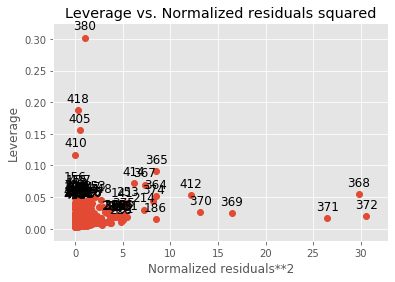

In [70]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(est2)
plt.show()

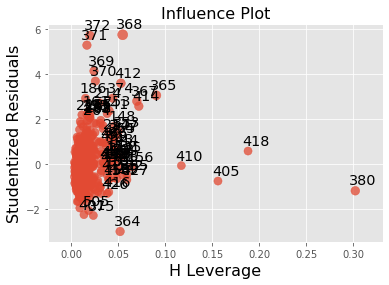

In [71]:
influence_plot(est2, size = 10)
plt.show()

In [72]:
# an alternative route at determining high influential points! 

import math
temp_X_res[abs(temp_X_res.dffits) > 2 * math.sqrt(8/506)].sort_values(by = 'dffits', ascending = False)

CRIM     NOX     RM      DIS   RAD  PTRATIO       B  LSTAT  MEDV  \
368   4.89822  0.6310  4.970   1.3325  24.0     20.2  375.52   3.26  50.0   
365   4.55587  0.7180  3.561   1.6132  24.0     20.2  354.70   7.12  27.5   
412  18.81100  0.5970  4.628   1.5539  24.0     20.2   28.79  34.37  17.9   
372   8.26725  0.6680  5.875   1.1296  24.0     20.2  347.88   8.88  50.0   
367  13.52220  0.6310  3.863   1.5106  24.0     20.2  131.42  13.33  23.1   
414  45.74610  0.6930  4.519   1.6582  24.0     20.2   88.27  36.98   7.0   
371   9.23230  0.6310  6.216   1.1691  24.0     20.2  366.15   9.53  50.0   
369   5.66998  0.6310  6.683   1.3567  24.0     20.2  375.33   3.73  50.0   
374  18.49820  0.6680  4.138   1.1370  24.0     20.2  396.90  37.97  13.8   
370   6.53876  0.6310  7.016   1.2024  24.0     20.2  392.05   2.96  50.0   
253   0.36894  0.4310  8.259   8.9067   7.0     19.1  396.90   3.54  42.8   
214   0.28955  0.4890  5.412   3.5875   4.0     18.6  348.93  29.55  23.7   
141   1.62864  0.6240  5.019   1.4394   4.0     21.2  396.90  34.41  14.4   
148   2.33099  0.8710  5.186   1.5296   5.0     14.7  356.99  28.32  17.8   
186   0.05602  0.4880  7.831   3.1992   3.0     17.8  392.63   4.45  50.0   
225   0.52693  0.5040  8.725   2.8944   8.0     17.4  382.00   4.63  50.0   
353   0.01709  0.4100  6.728  12.1265   5.0     17.0  384.46   4.50  30.1   
267   0.57834  0.5750  8.297   2.4216   5.0     13.0  384.54   7.44  50.0   
161   1.46336  0.6050  7.489   1.9709   5.0     14.7  374.43   1.73  50.0   
373  11.10810  0.6680  4.906   1.1742  24.0     20.2  396.90  34.77  13.8   
166   2.01019  0.6050  7.929   2.0459   5.0     14.7  369.30   3.70  50.0   
162   1.83377  0.6050  7.802   2.0407   5.0     14.7  389.61   1.92  50.0   
233   0.33147  0.5070  8.247   3.6519   8.0     17.4  378.95   3.95  48.3   
262   0.52014  0.6470  8.398   2.2885   5.0     13.0  386.86   5.91  48.8   
163   1.51902  0.6050  8.375   2.1620   5.0     14.7  388.45   3.32  50.0   
283   0.01501  0.4010  7.923   5.8850   1.0     13.6  395.52   3.16  50.0   
147   2.36862  0.8710  4.926   1.4608   5.0     14.7  391.71  29.53  14.6   
64    0.01951  0.4161  7.104   9.2229   3.0     18.6  393.24   8.05  33.0   
195   0.01381  0.4220  7.875   5.6484   4.0     14.4  394.23   2.97  50.0   
418  73.53410  0.6790  5.957   1.8026  24.0     20.2   16.45  20.62   8.8   
257   0.61154  0.6470  8.704   1.8010   5.0     13.0  389.70   5.12  50.0   
204   0.02009  0.4161  8.034   5.1180   4.0     14.7  390.55   2.88  50.0   
355   0.10659  0.4130  5.936  10.5857   4.0     22.0  376.04   5.57  20.6   
416  10.83420  0.6790  6.782   1.8195  24.0     20.2   21.57  25.79   7.5   
426  12.24720  0.5840  5.837   1.9976  24.0     20.2   24.65  15.69  10.2   
401  14.23620  0.6930  6.343   1.5741  24.0     20.2  396.90  20.32   7.2   
505   0.04741  0.5730  6.030   2.5050   1.0     21.0  396.90   7.88  11.9   
405  67.92080  0.6930  5.683   1.4254  24.0     20.2  384.97  22.98   5.0   
375  19.60910  0.6710  7.313   1.3163  24.0     20.2  396.90  13.44  15.0   
364   3.47428  0.7180  8.780   1.9047  24.0     20.2  354.55   5.29  21.9   
380  88.97620  0.6710  6.968   1.4165  24.0     20.2  396.90  17.21  10.4   

        cooks    dffits  leverage  resid_student  
368  0.199343  1.381855  0.054733       5.742714  
365  0.101501  0.963751  0.090537       3.054523  
412  0.078104  0.848394  0.052824       3.592498  
372  0.068710  0.811006  0.019764       5.711467  
367  0.064292  0.765874  0.069801       2.795863  
414  0.056326  0.716003  0.071916       2.572147  
371  0.049786  0.687256  0.016652       5.281208  
369  0.045493  0.650138  0.024151       4.132627  
374  0.043351  0.629365  0.044204       2.926531  
370  0.038796  0.598337  0.025675       3.685929  
253  0.026086  0.486780  0.040430       2.371492  
214  0.025331  0.480533  0.030285       2.719161  
141  0.022067  0.447456  0.038200       2.245242  
148  0.014778  0.365363  0.045229       1.678663  
186  0.01

### Conclusion of removal of influential points: Given the little difference between R**2, standard error of coefficients and t-statistic, it might be better not to drop index observations of 365 and 368. However, for the sake of learning, let's observe how the residual patterns look like after dropping those 2 points.


In [73]:
X = data_boston_noCHASnoTAX.drop(['MEDV'], axis = 1)
y = data_boston_noCHASnoTAX['MEDV']
X = X[~X.index.isin([365,368])]
y = y[~y.index.isin([365,368])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['AGE','INDUS','ZN'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     139.0
Date:                Sun, 24 May 2020   Prob (F-statistic):          9.96e-110
Time:                        12:36:50   Log-Likelihood:                -1189.6
No. Observations:                 403   AIC:                             2397.
Df Residuals:                     394   BIC:                             2433.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5119      5.913      3.638      0.0

In [74]:
X_test_mod = X_test.copy()
X_test_mod = X_test_mod.drop(['AGE','INDUS','ZN'], axis = 1)

predict_2 = est2.predict(smf.add_constant(X_test_mod))
predict_2

104    21.554154
123    15.610085
188    32.204299
23     14.402330
430    17.878072
         ...    
458    17.287919
239    28.536221
65     28.418038
321    24.619252
131    20.160395
Length: 101, dtype: float64

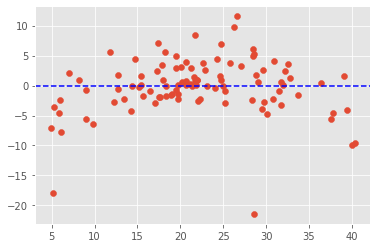

In [75]:
error_2 = predict_2 - y_test

plt.scatter(x = predict_2, y = error_2)
plt.axhline(y=0, color='b', linestyle='--')

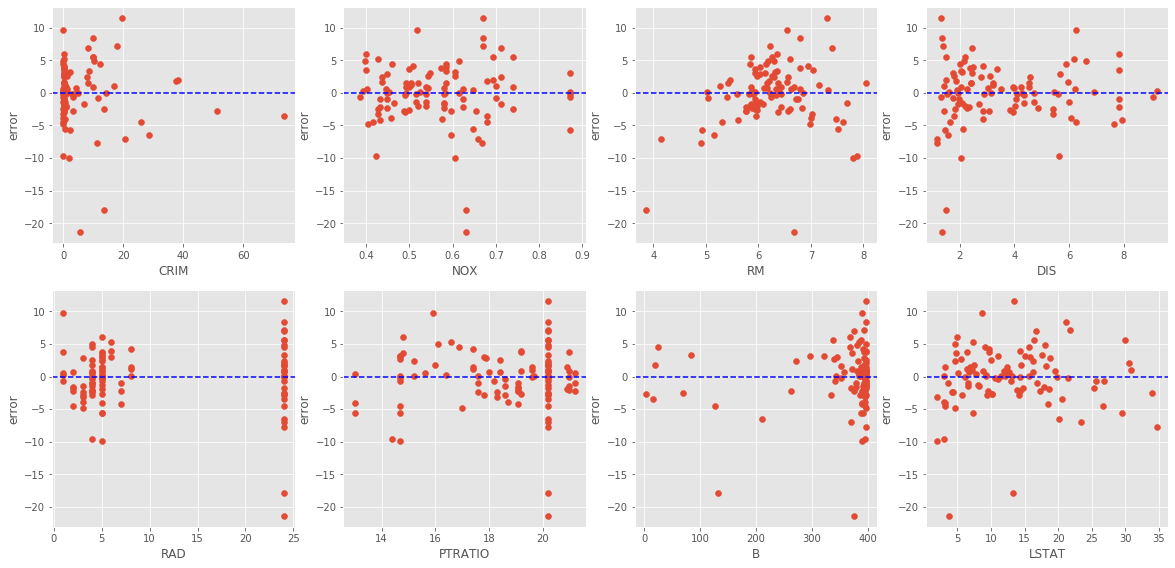

In [76]:
plt.figure(figsize = (20,20))

i = 1

for variable in (X_test_mod.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = X_test_mod[variable], y = error_2)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

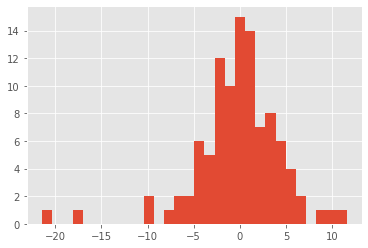

In [77]:
error_2.hist(bins = 30)

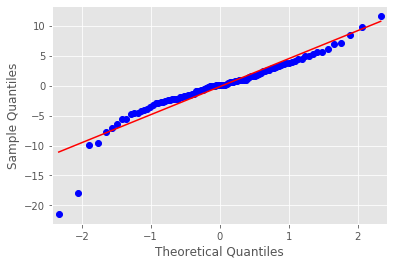

In [78]:
qqplot(error_2, line = 's')
plt.show()

In [79]:
# normality test for error_2
stat, p = shapiro(error_2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.911, p=0.000
Sample does not look Gaussian (reject H0)


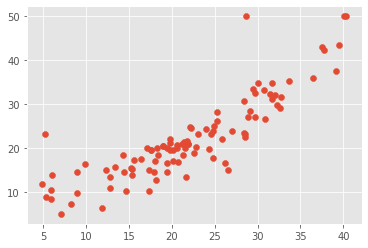

In [80]:
plt.scatter(predict_2,y_test)

Text(0, 0.5, 'Residual Error')

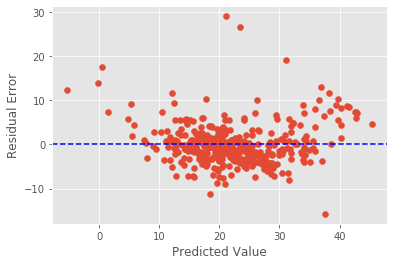

In [81]:
resid = est2.resid
plt.scatter(est2.predict(), resid)
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Error')

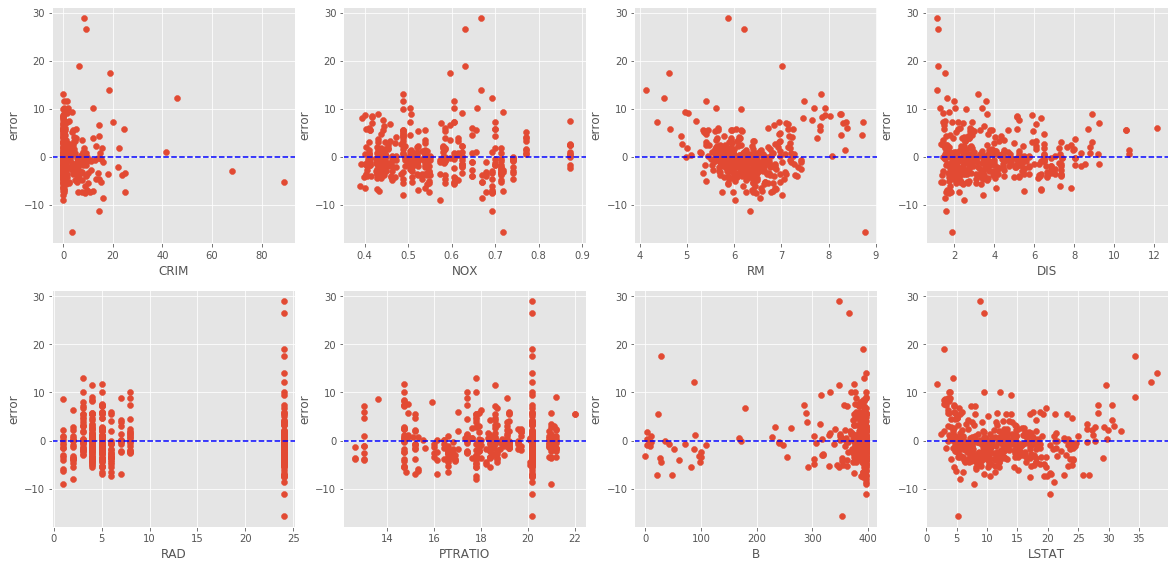

In [82]:
plt.figure(figsize = (20,20))

i = 1

for variable in (X_test_mod.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = Xs[variable], y = resid)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

##### Observation:

Had trouble interpreting those graphs of CRIM, RAD and B as their distribution were unevenly distributed in the first place. Variance seems equally spaced like a band, but coz of the skewed distribution, it becomes unbalanced. Therefore, it may not be obeying the linearity assumption.Across my research, i arrived at this link by statwing / Qualitrics and they gave the following response:

Sometimes there’s actually nothing wrong with your model. In the above example, it’s quite clear that this isn’t a good model, but sometimes the residual plot is unbalanced and the model is quite good.

The only ways to tell are to a) experiment with transforming your data and see if you can improve it and b) look at the predicted vs. actual plot and see if your prediction is wildly off for a lot of datapoints, as in the above example (but unlike the below example).

While there’s no explicit rule that says your residual can’t be unbalanced and still be accurate (indeed this model is quite accurate), it’s more often the case that an x-axis unbalanced residual means your model can be made significantly more accurate. Most of the time you’ll find that the model was directionally correct but pretty inaccurate relative to an improved version. It’s not uncommon to fix an issue like this and consequently see the model’s r-squared jump from 0.2 to 0.5 (on a 0 to 1 scale).

In [83]:
resid[~resid.index.isin([372,371])]

331   -3.102006
502   -0.578805
283    8.713960
460   -3.368038
207    4.264971
         ...   
312   -3.368450
31    -3.599220
328   -3.934533
184    5.423379
19     0.762548
Length: 401, dtype: float64

In [84]:
resid.sort_values(0,ascending = False)

372    28.969841
371    26.514908
370    18.976709
412    17.490479
374    13.997171
         ...    
88     -7.979302
381    -8.645355
505    -9.001897
401   -11.193769
364   -15.700279
Length: 403, dtype: float64

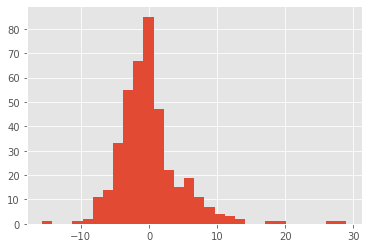

In [85]:
resid.hist(bins = 30)

In [86]:
# normality test for error_1
stat, p = shapiro(resid[~resid.index.isin([372,371])])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.950, p=0.000
Sample does not look Gaussian (reject H0)


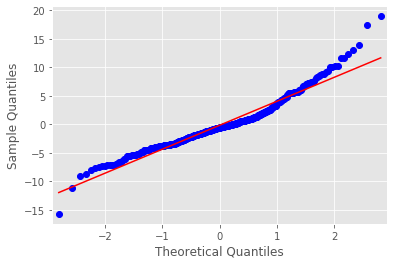

In [87]:
qqplot(resid[~resid.index.isin([372,371])],line = 's')
plt.show()

In [88]:
# This "get_prediction" extension of the model gives us the prediction and confidence interval 
# of a given row of observations

dt = est2.get_prediction(smf.add_constant(X_test_mod))
dt.summary_frame()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
104  21.554154  0.532307      20.507637      22.600670     12.286251   
123  15.610085  0.766151      14.103831      17.116340      6.279082   
188  32.204299  0.591276      31.041849      33.366749     22.922590   
23   14.402330  0.592050      13.238358      15.566302      5.120431   
430  17.878072  0.878551      16.150837      19.605306      8.508858   
..         ...       ...            ...            ...           ...   
458  17.287919  0.548390      16.209783      18.366056      8.016393   
239  28.536221  0.420111      27.710282      29.362161     19.290628   
65   28.418038  0.548435      27.339813      29.496263     19.146501   
321  24.619252  0.397730      23.837314      25.401190     15.377485   
131  20.160395  0.659893      18.863044      21.457746     10.860828   

     obs_ci_upper  
104     30.822056  
123     24.941089  
188     41.486007  
23      23.684230  
430     27.247285  
..            ...  
458     26.559446  
239     37.781815  
65      37.689574  
321     33.861019  
131     29.459962  

[101 rows x 6 columns]

### Next Steps:
> 1. Apply learning Curve
2. Read up on categorical predictors

In [89]:
data_boston_temp = data_boston.copy()
data_boston_temp = data_boston_temp[~data_boston_temp.index.isin([365,368])]
data_boston_temp

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[504 rows x 14 columns]

In [90]:
data_boston_temp_noAGEnoINDUSnoZN = data_boston_temp.drop(['AGE','INDUS','ZN'], axis = 1)
data_boston_temp_noAGEnoINDUSnoZN

CRIM  CHAS    NOX     RM     DIS  RAD    TAX  PTRATIO       B  LSTAT  \
0    0.00632   0.0  0.538  6.575  4.0900  1.0  296.0     15.3  396.90   4.98   
1    0.02731   0.0  0.469  6.421  4.9671  2.0  242.0     17.8  396.90   9.14   
2    0.02729   0.0  0.469  7.185  4.9671  2.0  242.0     17.8  392.83   4.03   
3    0.03237   0.0  0.458  6.998  6.0622  3.0  222.0     18.7  394.63   2.94   
4    0.06905   0.0  0.458  7.147  6.0622  3.0  222.0     18.7  396.90   5.33   
..       ...   ...    ...    ...     ...  ...    ...      ...     ...    ...   
501  0.06263   0.0  0.573  6.593  2.4786  1.0  273.0     21.0  391.99   9.67   
502  0.04527   0.0  0.573  6.120  2.2875  1.0  273.0     21.0  396.90   9.08   
503  0.06076   0.0  0.573  6.976  2.1675  1.0  273.0     21.0  396.90   5.64   
504  0.10959   0.0  0.573  6.794  2.3889  1.0  273.0     21.0  393.45   6.48   
505  0.04741   0.0  0.573  6.030  2.5050  1.0  273.0     21.0  396.90   7.88   

     MEDV  
0    24.0  
1    21.6  
2    34.7  
3    33.4  
4    36.2  
..    ...  
501  22.4  
502  20.6  
503  23.9  
504  22.0  
505  11.9  

[504 rows x 11 columns]

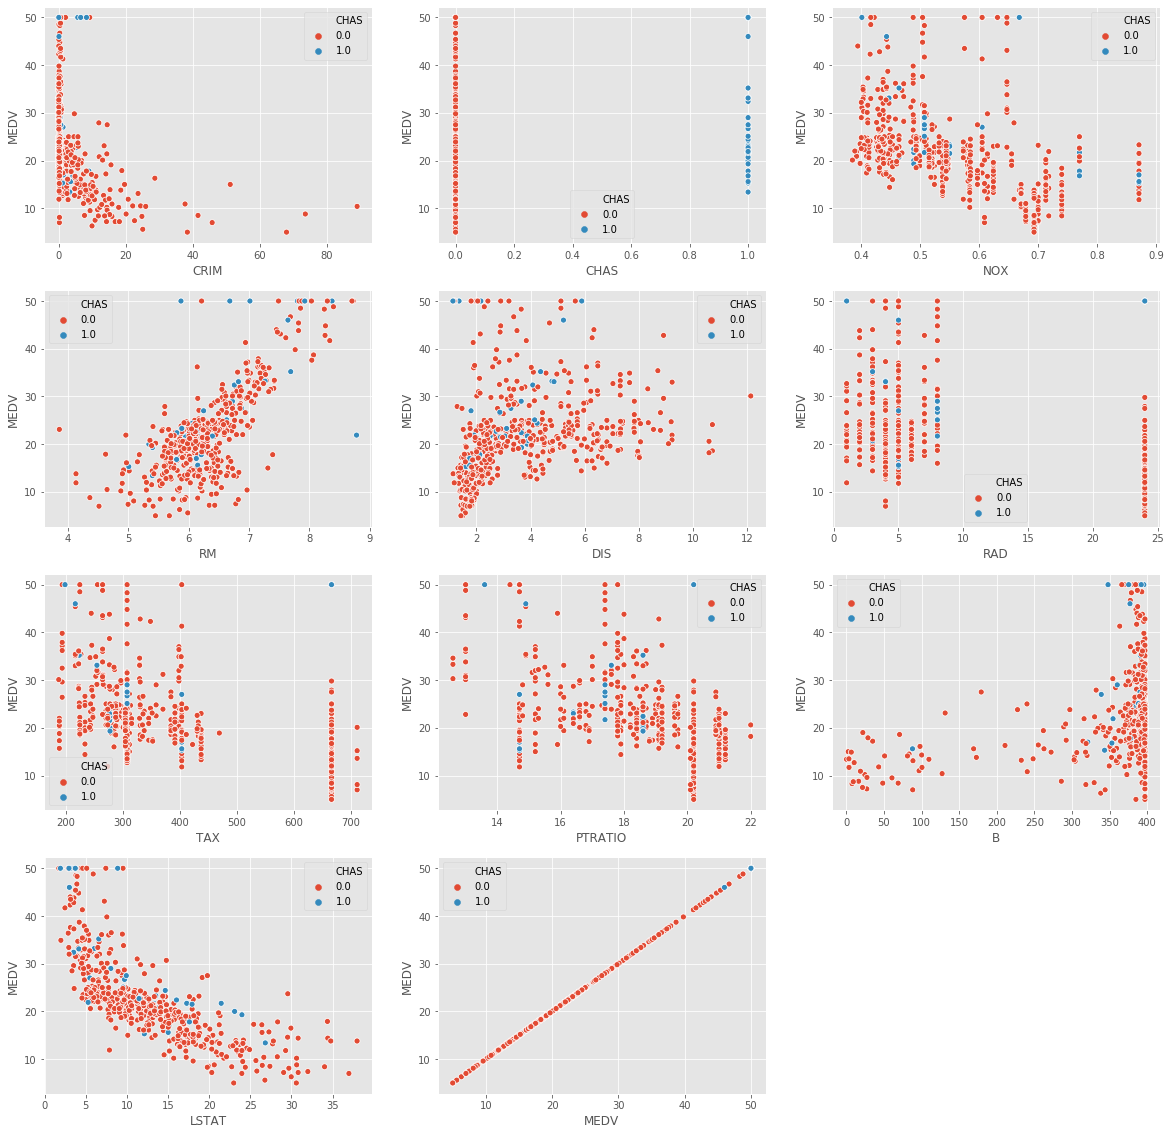

In [91]:
plt.figure(figsize = (20,20))

i = 1

for variable in list(data_boston_temp_noAGEnoINDUSnoZN.columns):
    plt.subplot(4,3,i)
    sns.scatterplot(x = data_boston_temp_noAGEnoINDUSnoZN[variable], y = data_boston_temp_noAGEnoINDUSnoZN['MEDV'], hue = data_boston_temp_noAGEnoINDUSnoZN['CHAS'])
    i += 1



### Here onwards, we'll now include in the categorical predictor


In [92]:
## Get variables for which to compute VIF and add intercept term
X_vif = data_boston_temp.drop(['MEDV','TAX'], axis = 1)
X_vif['Intercept'] = 1

## Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

## View results using print
print(vif)

## Observation: on first iteration, the TAX had high VIF ~8 again. Hence, i've dropped it.

    variables         VIF
0        CRIM    1.797055
1          ZN    2.194349
2       INDUS    3.217308
3        CHAS    1.058912
4         NOX    4.359653
5          RM    2.099972
6         AGE    3.138355
7         DIS    3.952494
8         RAD    2.876956
9     PTRATIO    1.785759
10          B    1.347538
11      LSTAT    3.246876
12  Intercept  607.086158


In [93]:
X = data_boston_temp.drop(['MEDV'], axis = 1)
y = data_boston_temp['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['TAX','INDUS','ZN','AGE'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est_full = smf.OLS(y, Xs2)
est2_full = est_full.fit()
print(est2_full.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sun, 24 May 2020   Prob (F-statistic):          1.01e-110
Time:                        12:36:56   Log-Likelihood:                -1184.6
No. Observations:                 403   AIC:                             2389.
Df Residuals:                     393   BIC:                             2429.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7154      5.849      3.713      0.0

Text(0, 0.5, 'Residual Error')

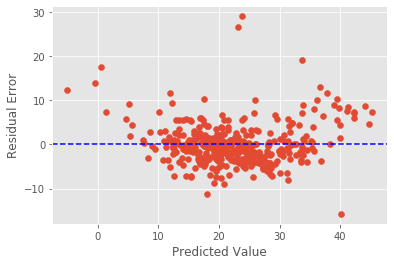

In [94]:
resid_full = est2_full.resid
plt.scatter(est2_full.predict(), resid)
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Error')

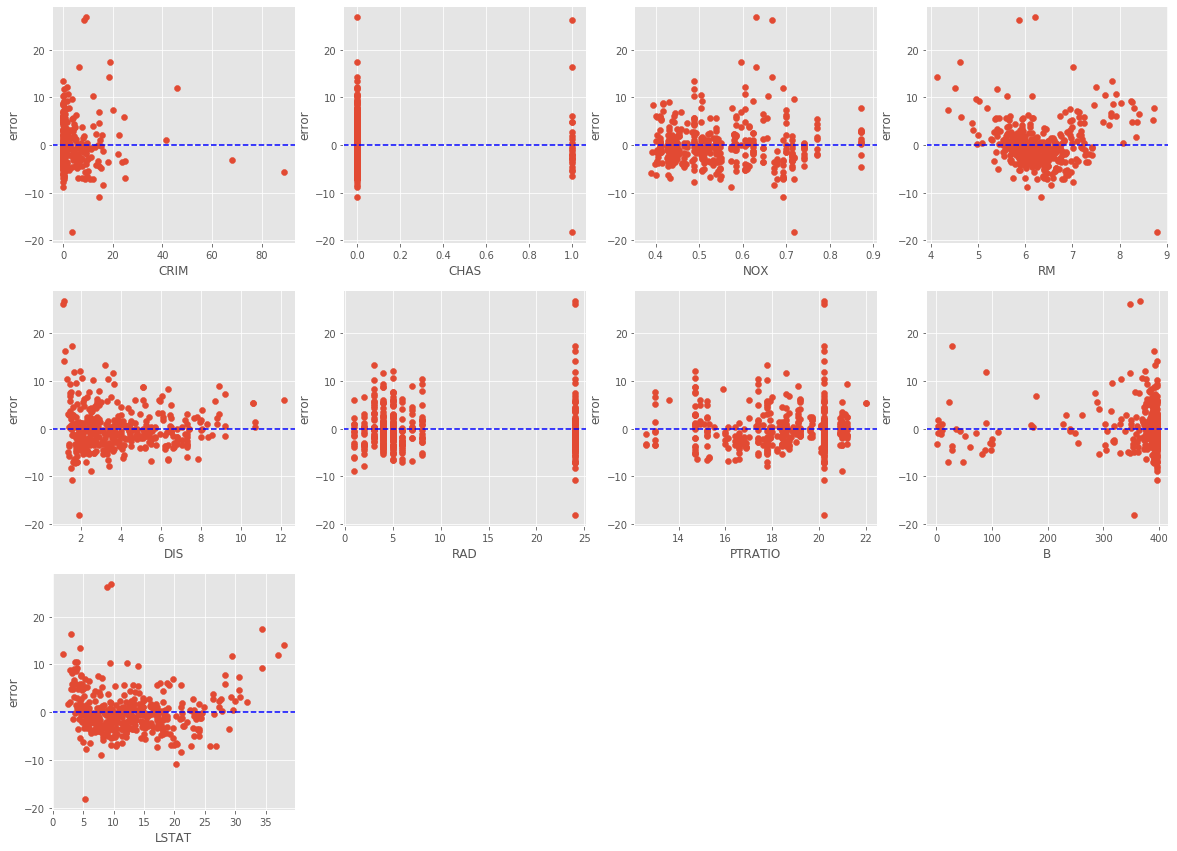

In [95]:
plt.figure(figsize = (20,20))

i = 1

for variable in (Xs.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = Xs[variable], y = resid_full)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

In [96]:
data_boston_temp_trans = data_boston_temp.copy()
data_boston_temp_trans['lnCRIM'] = np.log(data_boston_temp_trans['CRIM'])
data_boston_temp_trans['lnRAD'] = np.log(data_boston_temp_trans['RAD'])
data_boston_temp_trans['lnB'] = np.log(max(data_boston_temp_trans['B']) + 1 - data_boston_temp_trans['B'])
data_boston_temp_trans['lnDIS'] = np.log(data_boston_temp_trans['DIS'])



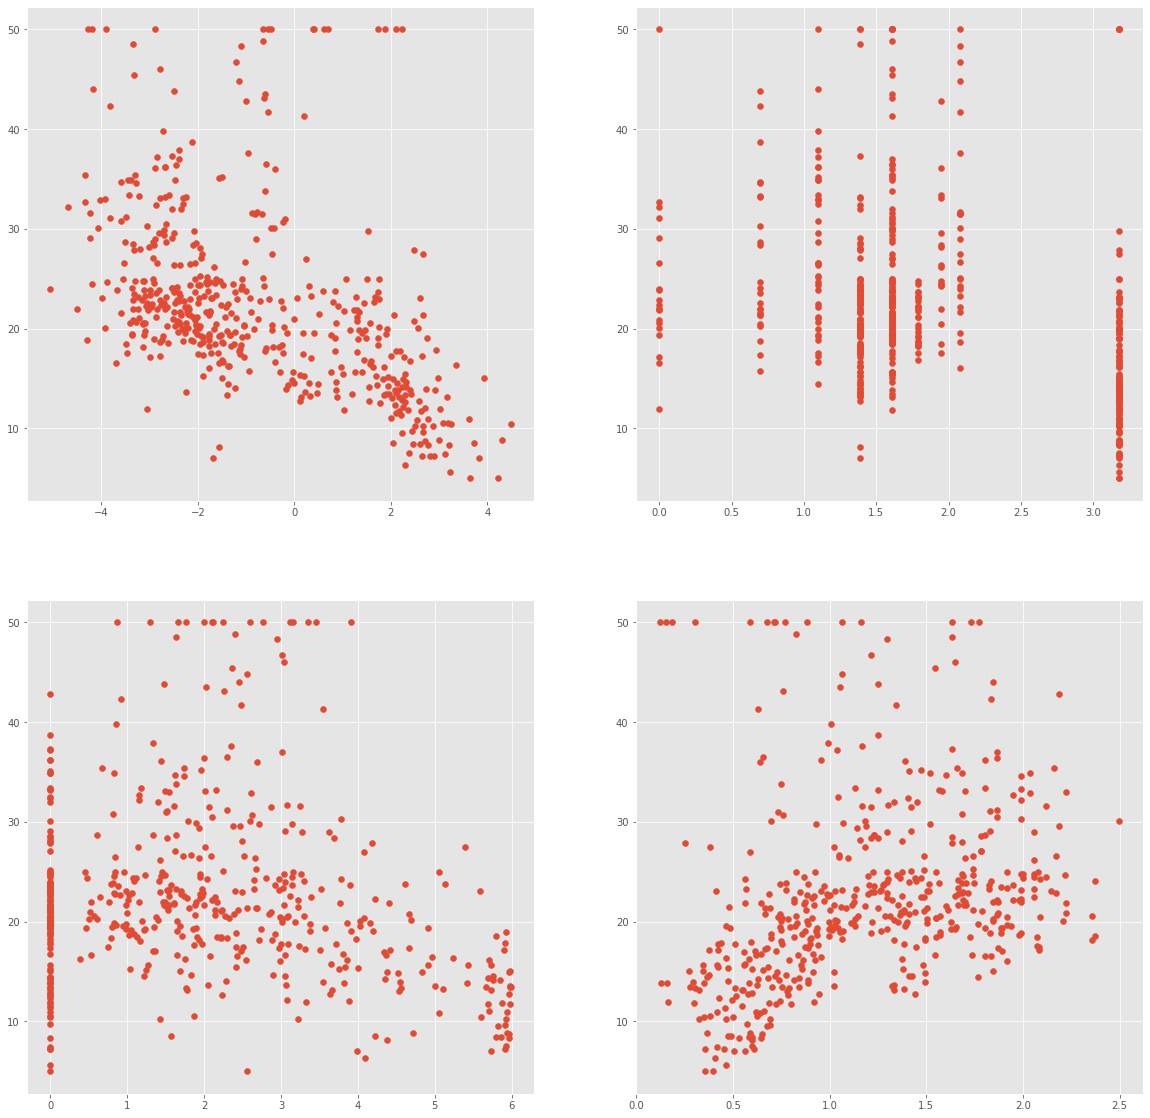

In [97]:
plt.figure(figsize = (20,20))

i = 1

for variable in ['lnCRIM','lnRAD','lnB','lnDIS']:
    plt.subplot(2,2,i)
    plt.scatter(x = variable, y = 'MEDV',data = data_boston_temp_trans)
    i += 1

In [98]:
X = data_boston_temp_trans.drop(['MEDV'], axis = 1)
y = data_boston_temp_trans['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['TAX','INDUS','ZN','AGE','CRIM','RAD','B','DIS'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est_full = smf.OLS(y, Xs2)
est2_full = est_full.fit()
print(est2_full.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 24 May 2020   Prob (F-statistic):          4.02e-111
Time:                        12:36:58   Log-Likelihood:                -1183.7
No. Observations:                 403   AIC:                             2387.
Df Residuals:                     393   BIC:                             2427.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4304      5.905      6.677      0.0

Text(0, 0.5, 'Residual Error')

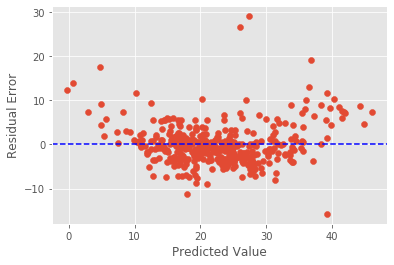

In [99]:
resid_full = est2_full.resid
plt.scatter(est2_full.predict(), resid)
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Error')

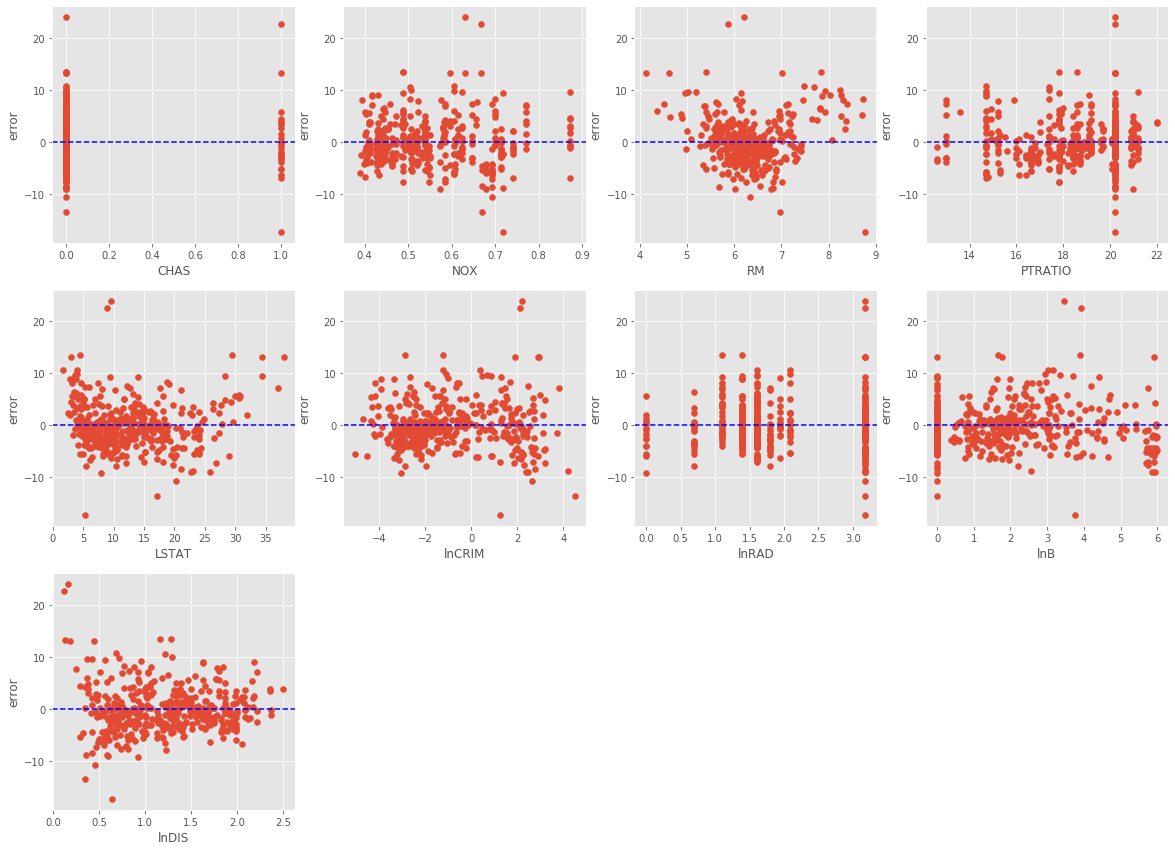

In [100]:
plt.figure(figsize = (20,20))

i = 1

for variable in (Xs.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = Xs[variable], y = resid_full)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

In [420]:
X = data_boston_temp_trans.drop(['MEDV'], axis = 1)
y = data_boston_temp_trans['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['TAX','INDUS','ZN','AGE','CRIM','RAD','B','lnCRIM','lnRAD','lnB','DIS'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est_full = smf.OLS(y, Xs2)
est2_full = est_full.fit()
print(est2_full.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 24 May 2020   Prob (F-statistic):          3.04e-114
Time:                        16:07:49   Log-Likelihood:                -1184.3
No. Observations:                 403   AIC:                             2383.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5529      5.218      7.196      0.0

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'Residual Error')

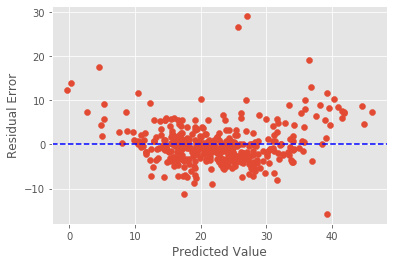

In [421]:
resid_full = est2_full.resid
plt.scatter(est2_full.predict(), resid)
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Error')

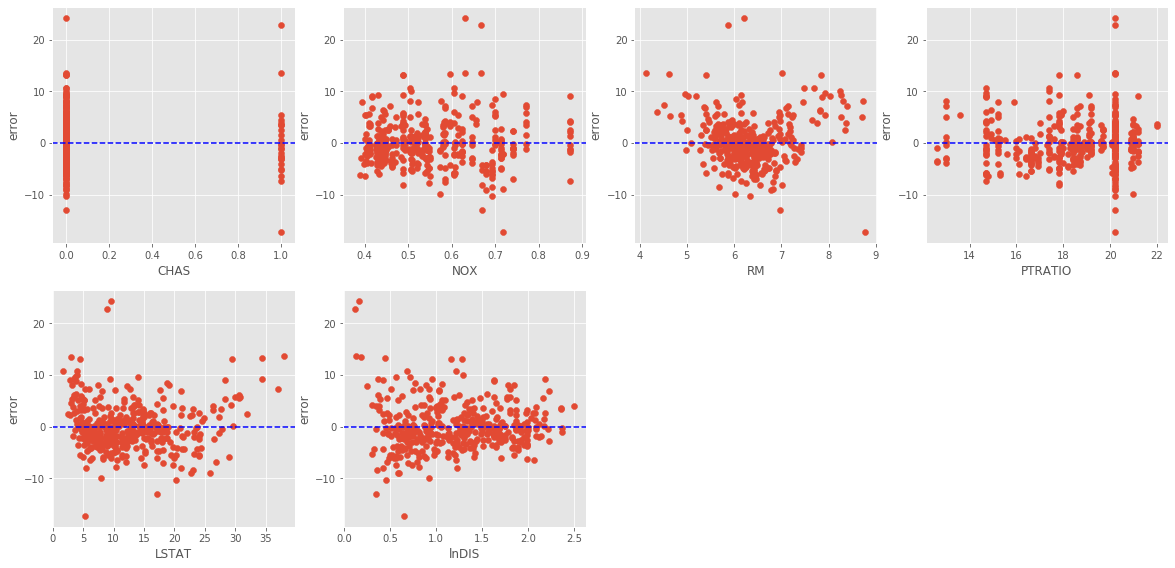

In [422]:
plt.figure(figsize = (20,20))

i = 1

for variable in (Xs.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = Xs[variable], y = resid_full)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

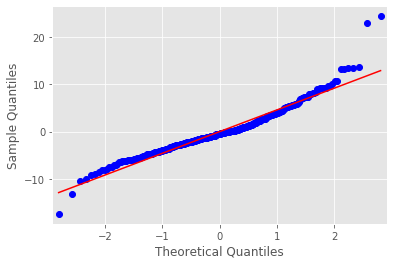

In [423]:
qqplot(resid_full, line = 's')
plt.show()

In [424]:
# normality test for error_2
stat, p = shapiro(resid_full)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)


In [430]:
X_test_full = X_test.drop(['TAX','INDUS','ZN','AGE','CRIM','RAD','B','lnCRIM','lnRAD','lnB','DIS'], axis = 1)

predict_full = est2_full.predict(smf.add_constant(X_test_full))

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [429]:
X_test_full

CHAS    NOX     RM  PTRATIO  LSTAT     lnDIS
104   0.0  0.520  6.167     20.9  12.33  0.884181
123   0.0  0.581  5.856     19.1  25.41  0.664953
188   0.0  0.437  6.556     15.2   4.56  1.518791
23    0.0  0.538  5.813     21.0  19.88  1.409816
430   0.0  0.584  6.348     20.2  17.64  0.719156
..    ...    ...    ...      ...    ...       ...
458   0.0  0.713  6.301     20.2  16.23  1.023565
239   0.0  0.428  6.606     16.6   7.37  1.822919
65    0.0  0.398  6.290     16.1   4.67  1.888811
321   0.0  0.493  6.376     19.6   6.87  1.513015
131   0.0  0.624  6.326     21.2  12.26  0.820220

[101 rows x 6 columns]

In [431]:
smf.tools.eval_measures.rmse(predict_full, y_test)

4.596863009556014

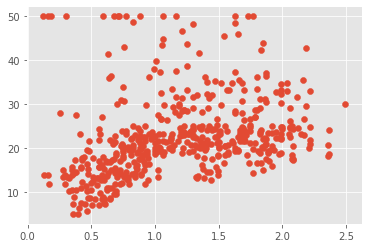

In [106]:
plt.scatter(x = np.log(data_boston_temp_trans['DIS']), y = data_boston_temp_trans['MEDV'])

# an attempt to determine the presence of interaction terms

In [107]:
temp_x_for_interaction_terms = data_boston_temp_trans.loc[:,['CHAS','NOX','RM','PTRATIO','LSTAT','DIS']]
temp_x_for_interaction_terms

CHAS    NOX     RM  PTRATIO  LSTAT     DIS
0     0.0  0.538  6.575     15.3   4.98  4.0900
1     0.0  0.469  6.421     17.8   9.14  4.9671
2     0.0  0.469  7.185     17.8   4.03  4.9671
3     0.0  0.458  6.998     18.7   2.94  6.0622
4     0.0  0.458  7.147     18.7   5.33  6.0622
..    ...    ...    ...      ...    ...     ...
501   0.0  0.573  6.593     21.0   9.67  2.4786
502   0.0  0.573  6.120     21.0   9.08  2.2875
503   0.0  0.573  6.976     21.0   5.64  2.1675
504   0.0  0.573  6.794     21.0   6.48  2.3889
505   0.0  0.573  6.030     21.0   7.88  2.5050

[504 rows x 6 columns]

In [108]:
from sklearn.preprocessing import PolynomialFeatures

#generating interaction terms
temp_x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(temp_x_for_interaction_terms)


In [109]:
temp_x_interaction_df = pd.DataFrame(temp_x_interaction, columns = ['CHAS','NOX','RM','PTRATIO','LSTAT','DIS',
                                           'CHAS:NOX','CHAS:RM','CHAS:PTRATIO','CHAS:LSTAT','CHAS:DIS',
                                           'NOX:RM','NOX:PTRATIO','NOX:LSTAT','NOX:DIS',
                                           'RM:PTRATIO','RM:LSTAT','RM:DIS',
                                           'PTRATIO:LSTAT','PTRATIO:DIS',
                                           'LSTAT:DIS'])

temp_x_interaction_df['lnDIS'] = np.log(temp_x_interaction_df['DIS'])

temp_x_interaction_df.drop('DIS', axis = 1,inplace = True)

temp_x_interaction_df = pd.concat([temp_x_interaction_df,data_boston_temp_trans['MEDV'].reset_index(drop = True)], axis = 1)

temp_x_interaction_df

CHAS    NOX     RM  PTRATIO  LSTAT  CHAS:NOX  CHAS:RM  CHAS:PTRATIO  \
0     0.0  0.538  6.575     15.3   4.98       0.0      0.0           0.0   
1     0.0  0.469  6.421     17.8   9.14       0.0      0.0           0.0   
2     0.0  0.469  7.185     17.8   4.03       0.0      0.0           0.0   
3     0.0  0.458  6.998     18.7   2.94       0.0      0.0           0.0   
4     0.0  0.458  7.147     18.7   5.33       0.0      0.0           0.0   
..    ...    ...    ...      ...    ...       ...      ...           ...   
499   0.0  0.573  6.593     21.0   9.67       0.0      0.0           0.0   
500   0.0  0.573  6.120     21.0   9.08       0.0      0.0           0.0   
501   0.0  0.573  6.976     21.0   5.64       0.0      0.0           0.0   
502   0.0  0.573  6.794     21.0   6.48       0.0      0.0           0.0   
503   0.0  0.573  6.030     21.0   7.88       0.0      0.0           0.0   

     CHAS:LSTAT  CHAS:DIS  ...  NOX:LSTAT   NOX:DIS  RM:PTRATIO  RM:LSTAT  \
0           0.0       0.0  ...    2.67924  2.200420    100.5975  32.74350   
1           0.0       0.0  ...    4.28666  2.329570    114.2938  58.68794   
2           0.0       0.0  ...    1.89007  2.329570    127.8930  28.95555   
3           0.0       0.0  ...    1.34652  2.776488    130.8626  20.57412   
4           0.0       0.0  ...    2.44114  2.776488    133.6489  38.09351   
..          ...       ...  ...        ...       ...         ...       ...   
499         0.0       0.0  ...    5.54091  1.420238    138.4530  63.75431   
500         0.0       0.0  ...    5.20284  1.310737    128.5200  55.56960   
501         0.0       0.0  ...    3.23172  1.241977    146.4960  39.34464   
502         0.0       0.0  ...    3.71304  1.368840    142.6740  44.02512   
503         0.0       0.0  ...    4.51524  1.435365    126.6300  47.51640   

        RM:DIS  PTRATIO:LSTAT  PTRATIO:DIS  LSTAT:DIS     lnDIS  MEDV  
0    26.891750         76.194     62.57700  20.368200  1.408545  24.0  
1    31.893749        162.692     88.41438  45.399294  1.602836  21.6  
2    35.688614         71.734     88.41438  20.017413  1.602836  34.7  
3    42.423276         54.978    113.36314  17.822868  1.802073  33.4  
4    43.326543         99.671    113.36314  32.311526  1.802073  36.2  
..         ...            ...          ...        ...       ...   ...  
499  16.341410        203.070     52.05060  23.968062  0.907694  22.4  
500  13.999500        190.680     48.03750  20.770500  0.827460  20.6  
501  15.120480        118.440     45.51750  12.224700  0.773574  23.9  
502  16.230187        136.080     50.16690  15.480072  0.870833  22.0  
503  15.105150        165.480     52.60500  19.739400  0.918289  11.9  

[504 rows x 22 columns]

In [110]:
X = temp_x_interaction_df.drop(['MEDV'], axis = 1)
y = temp_x_interaction_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
# Xs = Xs.drop(['TAX','INDUS','ZN','AGE','CRIM','RAD','B','lnCRIM','lnRAD','lnB','DIS'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est_temp_interaction = smf.OLS(y, Xs2)
est2_temp_interaction = est_temp_interaction.fit()
print(est2_temp_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 24 May 2020   Prob (F-statistic):          2.53e-149
Time:                        12:37:00   Log-Likelihood:                -1061.1
No. Observations:                 403   AIC:                             2166.
Df Residuals:                     381   BIC:                             2254.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -167.4649     27.184     -6.160

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [111]:
X = data_boston_temp_trans.drop(['MEDV'], axis = 1).reset_index(drop = True)
y = data_boston_temp_trans['MEDV'].reset_index(drop = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
Xs = Xs.drop(['TAX','INDUS','ZN','AGE','CRIM','RAD','B','lnCRIM','lnRAD','lnB','DIS'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est_full = smf.OLS(y, Xs2)
est2_full = est_full.fit()
print(est2_full.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 24 May 2020   Prob (F-statistic):          3.04e-114
Time:                        12:37:00   Log-Likelihood:                -1184.3
No. Observations:                 403   AIC:                             2383.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5529      5.218      7.196      0.0

In [262]:
X = temp_x_interaction_df.drop(['MEDV','NOX:PTRATIO','NOX:DIS','RM:DIS','CHAS:PTRATIO','LSTAT:DIS'], axis = 1)
y = temp_x_interaction_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

# Creating a first pass MLR model

import statsmodels.api as smf

Xs = X_train.copy()
#Xs = Xs.drop(['NOX:PTRATIO','NOX:DIS','RM:DIS','CHAS:PTRATIO','LSTAT:DIS'], axis = 1)
y = y_train
Xs2 = smf.add_constant(Xs) # in scikit learn, this is usually auto added. But OLS does not have it
est_temp_interaction = smf.OLS(y, Xs2)
est2_temp_interaction = est_temp_interaction.fit()
print(est2_temp_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 24 May 2020   Prob (F-statistic):          1.25e-153
Time:                        14:32:07   Log-Likelihood:                -1063.6
No. Observations:                 403   AIC:                             2161.
Df Residuals:                     386   BIC:                             2229.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -177.3069     24.232     -7.317

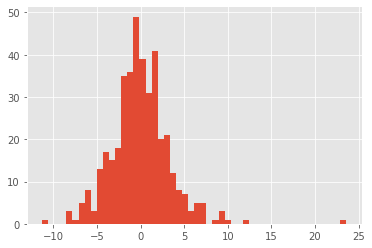

In [263]:
(est2_temp_interaction.resid).hist(bins = 50)

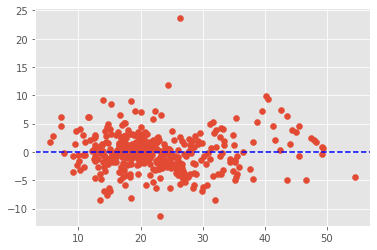

In [264]:
plt.scatter(y = est2_temp_interaction.resid, x = est2_temp_interaction.predict())
plt.axhline(y = 0, color = 'b', linestyle = '--')

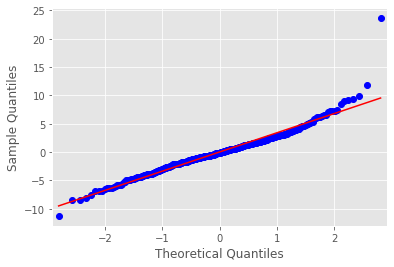

In [265]:
qqplot(est2_temp_interaction.resid, line = 's')
plt.show()

In [266]:
# normality test for error_1
stat, p = shapiro(est2_temp_interaction.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.000000001
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.949, p=0.000
Sample does not look Gaussian (reject H0)


In [267]:
# X_test_inter = X_test.drop(['NOX:PTRATIO','NOX:DIS','RM:DIS','CHAS:PTRATIO','LSTAT:DIS'], axis = 1)

predict_2 = est2_temp_interaction.predict(smf.add_constant(X_test))
error_inter = y_test - predict_2

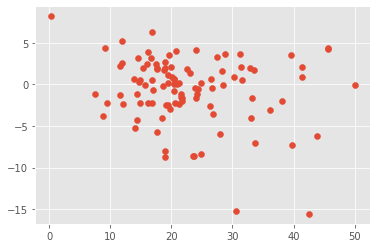

In [268]:
plt.scatter(x = predict_2, y = error_inter)

In [269]:
smf.tools.eval_measures.rmse(predict_2, y_test)

4.049632180659092

In [406]:
4.049632180659092 - 4.0496321806561575

2.9345414986892138e-12

In [120]:
#X_train_mod = X_train.drop(['NOX:PTRATIO','NOX:DIS','RM:DIS','CHAS:PTRATIO','LSTAT:DIS'], axis = 1)
#X_test_mod = X_test.drop(['NOX:PTRATIO','NOX:DIS','RM:DIS','CHAS:PTRATIO','LSTAT:DIS'], axis = 1)
#y_train_mod = y_train
#y_test_mod = y_test

In [121]:
# X_train_mod

CHAS     NOX     RM  PTRATIO  LSTAT  CHAS:NOX  CHAS:RM  CHAS:LSTAT  \
331   0.0  0.4379  5.706     16.9  12.43     0.000    0.000        0.00   
500   0.0  0.5730  6.120     21.0   9.08     0.000    0.000        0.00   
283   1.0  0.4010  7.923     13.6   3.16     0.401    7.923        3.16   
458   0.0  0.7130  6.701     20.2  16.42     0.000    0.000        0.00   
207   0.0  0.4890  5.783     18.6  18.06     0.000    0.000        0.00   
..    ...     ...    ...      ...    ...       ...      ...         ...   
312   0.0  0.5440  6.023     18.4  11.72     0.000    0.000        0.00   
31    0.0  0.5380  6.072     21.0  13.04     0.000    0.000        0.00   
328   0.0  0.4600  5.868     16.9   9.97     0.000    0.000        0.00   
184   0.0  0.4880  5.604     17.8  13.98     0.000    0.000        0.00   
19    0.0  0.5380  5.727     21.0  11.28     0.000    0.000        0.00   

     CHAS:DIS    NOX:RM  NOX:LSTAT  RM:PTRATIO   RM:LSTAT  PTRATIO:LSTAT  \
331     0.000  2.498657   5.443097     96.4314   70.92558        210.067   
500     0.000  3.506760   5.202840    128.5200   55.56960        190.680   
283     5.885  3.177123   1.267160    107.7528   25.03668         42.976   
458     0.000  4.777813  11.707460    135.3602  110.03042        331.684   
207     0.000  2.827887   8.831340    107.5638  104.44098        335.916   
..        ...       ...        ...         ...        ...            ...   
312     0.000  3.276512   6.375680    110.8232   70.58956        215.648   
31      0.000  3.266736   7.015520    127.5120   79.17888        273.840   
328     0.000  2.699280   4.586200     99.1692   58.50396        168.493   
184     0.000  2.734752   6.822240     99.7512   78.34392        248.844   
19      0.000  3.081126   6.068640    120.2670   64.60056        236.880   

     PTRATIO:DIS     lnDIS  
331    112.22783  1.893217  
500     48.03750  0.827460  
283     80.03600  1.772407  
458     52.46950  0.954549  
207     81.00114  1.471302  
..           ...       ...  
312     52.14560  1.041689  
31      87.67500  1.429114  
328     88.12674  1.651462  
184     53.18462  1.094571  
19      79.72650  1.334080  

[403 rows x 16 columns]

### plotting of learning curves

In [270]:
# lets create some training sizes first
# Max training size is 403

training_sizes = [1, 40, 80, 120, 280, 322]

#X = temp_x_interaction_df.drop(['MEDV'], axis = 1)
#y = temp_x_interaction_df['MEDV']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                             X = X_train,
                                                             y = y_train,
                                                             train_sizes = training_sizes,
                                                             cv = 5,
                                                             scoring = 'neg_mean_squared_error') #https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

#train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
#                                                             X = X_train_mod,
#                                                             y = y_train_mod,
#                                                             train_sizes = training_sizes,
#                                                             cv = 5,
#                                                             scoring = 'neg_mean_squared_error')

In [271]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [ -2.72877587  -7.07186681  -7.07186681  -7.07186681  -7.07186681]
 [ -6.42933695  -7.83227164  -7.83227164  -7.83227164  -7.83227164]
 [-10.12443836 -10.86168025  -8.75647324  -8.75647324  -8.75647324]
 [-10.02397021 -10.78441266  -9.35857107 -10.97452492 -10.17180977]
 [-11.34088847 -11.96833849 -10.74051378 -12.26418131 -10.30242186]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -149.43888889   -82.4945679   -117.36481481  -115.56425
   -118.67425   ]
 [  -22.44549031   -34.71856554   -20.26037397   -18.9636608
    -27.02466782]
 [  -18.31085549 -3122.36995365  -725.23151518   -19.1935973
   -818.04359928]
 [  -12.79325057   -13.01137492   -14.46728491    -9.05021129
    -17.09493981]
 [  -13.30993186   -11.57400539   -15.33263201    -9.25269233
    -17.65535819]
 [  -13.30899902   -11.54408147   -15.33910186    -8.77774226
    -17.28503174]]


In [272]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
40      6.203249
80      7.551685
120     9.451108
280    10.262658
322    11.323269
dtype: float64

 --------------------

Mean validation scores

 1      116.707354
40      24.682552
80     940.629904
120     13.283412
280     13.424924
322     13.250991
dtype: float64


(0, 40)

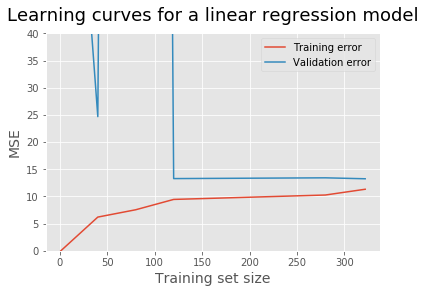

In [273]:
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

#### Observation about the learning curve. It is normal to see some noise in the plotting of learning curves.

***

In [274]:
temp_x_interaction_df

CHAS    NOX     RM  PTRATIO  LSTAT  CHAS:NOX  CHAS:RM  CHAS:PTRATIO  \
0     0.0  0.538  6.575     15.3   4.98       0.0      0.0           0.0   
1     0.0  0.469  6.421     17.8   9.14       0.0      0.0           0.0   
2     0.0  0.469  7.185     17.8   4.03       0.0      0.0           0.0   
3     0.0  0.458  6.998     18.7   2.94       0.0      0.0           0.0   
4     0.0  0.458  7.147     18.7   5.33       0.0      0.0           0.0   
..    ...    ...    ...      ...    ...       ...      ...           ...   
499   0.0  0.573  6.593     21.0   9.67       0.0      0.0           0.0   
500   0.0  0.573  6.120     21.0   9.08       0.0      0.0           0.0   
501   0.0  0.573  6.976     21.0   5.64       0.0      0.0           0.0   
502   0.0  0.573  6.794     21.0   6.48       0.0      0.0           0.0   
503   0.0  0.573  6.030     21.0   7.88       0.0      0.0           0.0   

     CHAS:LSTAT  CHAS:DIS  ...  NOX:LSTAT   NOX:DIS  RM:PTRATIO  RM:LSTAT  \
0           0.0       0.0  ...    2.67924  2.200420    100.5975  32.74350   
1           0.0       0.0  ...    4.28666  2.329570    114.2938  58.68794   
2           0.0       0.0  ...    1.89007  2.329570    127.8930  28.95555   
3           0.0       0.0  ...    1.34652  2.776488    130.8626  20.57412   
4           0.0       0.0  ...    2.44114  2.776488    133.6489  38.09351   
..          ...       ...  ...        ...       ...         ...       ...   
499         0.0       0.0  ...    5.54091  1.420238    138.4530  63.75431   
500         0.0       0.0  ...    5.20284  1.310737    128.5200  55.56960   
501         0.0       0.0  ...    3.23172  1.241977    146.4960  39.34464   
502         0.0       0.0  ...    3.71304  1.368840    142.6740  44.02512   
503         0.0       0.0  ...    4.51524  1.435365    126.6300  47.51640   

        RM:DIS  PTRATIO:LSTAT  PTRATIO:DIS  LSTAT:DIS     lnDIS  MEDV  
0    26.891750         76.194     62.57700  20.368200  1.408545  24.0  
1    31.893749        162.692     88.41438  45.399294  1.602836  21.6  
2    35.688614         71.734     88.41438  20.017413  1.602836  34.7  
3    42.423276         54.978    113.36314  17.822868  1.802073  33.4  
4    43.326543         99.671    113.36314  32.311526  1.802073  36.2  
..         ...            ...          ...        ...       ...   ...  
499  16.341410        203.070     52.05060  23.968062  0.907694  22.4  
500  13.999500        190.680     48.03750  20.770500  0.827460  20.6  
501  15.120480        118.440     45.51750  12.224700  0.773574  23.9  
502  16.230187        136.080     50.16690  15.480072  0.870833  22.0  
503  15.105150        165.480     52.60500  19.739400  0.918289  11.9  

[504 rows x 22 columns]

In [417]:
from sklearn.model_selection import cross_val_score

Xs = X_train
y = y_train

lin_reg = LinearRegression()

r2s = cross_val_score(lin_reg, Xs, y, scoring='r2', cv = 5)



In [418]:
np.mean(r2s)

0.8368773831963324

In [419]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 1e6)

parameters = {'alpha':[1e-17, 1e-16, 1e-15, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)

lasso_regressor.fit(Xs, y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1822.7501314095414, tolerance: 2.547867605590062
  positive)
/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1926.682436335717, tolerance: 2.7287804006211185
  positive)
/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1728.944448336126, tolerance: 2.580806819875777
  positive)
/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You 

{'alpha': 1e-15}
0.836889231068576


/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2159.291988232353, tolerance: 3.304384674937965
  positive)


In [402]:
lasso_regressor.cv_results_

{'mean_fit_time': array([2.81076035e+00, 2.82817287e+00, 2.34508038e-02, 1.17774487e-02,
        9.77292061e-03, 7.17821121e-03, 1.86586380e-03, 1.62334442e-03,
        1.40743256e-03, 1.25675201e-03]),
 'std_fit_time': array([5.50321882e-02, 2.74279930e-02, 2.35558644e-03, 5.61795111e-04,
        7.73431393e-04, 7.17343630e-04, 1.49394840e-04, 4.81070325e-05,
        1.28024819e-04, 3.51180127e-06]),
 'mean_score_time': array([0.00082645, 0.00082026, 0.00094457, 0.00065088, 0.00074162,
        0.00081811, 0.00079694, 0.00076046, 0.00062704, 0.00062189]),
 'std_score_time': array([7.29100387e-05, 5.32797195e-05, 4.02432748e-04, 3.64884817e-05,
        9.22201831e-05, 8.44827883e-05, 9.34917776e-05, 2.64761014e-05,
        7.18902194e-06, 1.81323560e-06]),
 'param_alpha': masked_array(data=[1e-16, 1e-15, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
       

In [387]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha = 1e-15, max_iter = 1e6)
clf.fit(Xs, y)

Lasso(alpha=1e-14, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [388]:
clf.coef_

array([ 8.85593803e+01,  9.85247034e+01,  3.25195860e+01,  5.32642556e+00,
        4.13888189e+00, -2.21941908e+01, -8.11281017e+00, -9.53578041e-01,
       -2.74719665e+00, -1.48499405e+01, -1.89540363e+00, -8.14899866e-01,
       -3.34832096e-01, -8.14470183e-02,  3.61956114e-02, -6.51496493e+00])

In [389]:
clf.intercept_

-177.30694687689447

In [390]:
clf.score(Xs, y)

0.860015173490702

In [391]:
print(clf.sparse_coef_)

  (0, 0)	88.5593802932398
  (0, 1)	98.5247034489326
  (0, 2)	32.51958596669037
  (0, 3)	5.326425564711728
  (0, 4)	4.138881890694269
  (0, 5)	-22.194190802467148
  (0, 6)	-8.112810168860397
  (0, 7)	-0.953578040941992
  (0, 8)	-2.7471966475016325
  (0, 9)	-14.84994053878697
  (0, 10)	-1.8954036258772498
  (0, 11)	-0.8148998662952804
  (0, 12)	-0.3348320962179861
  (0, 13)	-0.08144701828198671
  (0, 14)	0.03619561141326622
  (0, 15)	-6.514964927191487


In [342]:
clf.n_iter_

3258

In [404]:
predict_3 = clf.predict(X_test)

In [405]:
smf.tools.eval_measures.rmse(predict_3, y_test)

4.0496321806561575

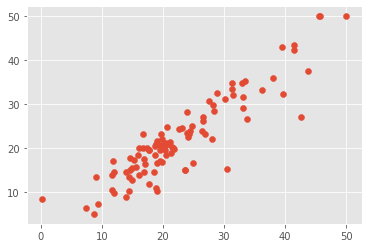

In [407]:
plt.scatter(predict_3, y_test)

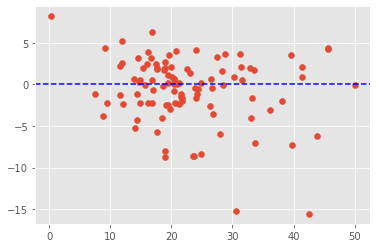

In [410]:
resid_3 = y_test - predict_3

plt.scatter(y = resid_3, x = predict_3)
plt.axhline(y = 0, color = 'b', linestyle = '--')

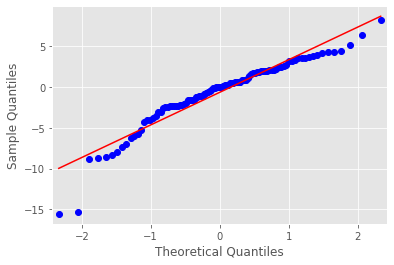

In [413]:
qqplot(resid_3, line = 's')
plt.show()

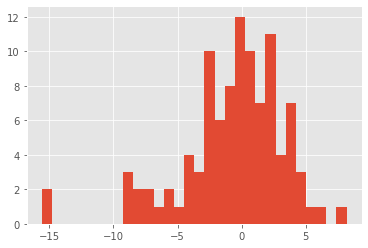

In [415]:
resid_3.hist(bins = 30)

In [416]:
# normality test for error_1
stat, p = shapiro(resid_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.000000001
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.928, p=0.000
Sample looks Gaussian (fail to reject H0)


In [289]:
# standardising our X_test and X_train

from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train)

X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

In [309]:
lasso = Lasso(max_iter = 1e6)

#parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
parameters = {'alpha':[20, 10, 5, 1, 0.955, 0.9, 0.5, 0.1, 1e-2, 1e-3, 1e-4, 1e-8, 1e-10, 1e-15, 1e-16, 1e-20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train_stand, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075.8357108649661, tolerance: 2.547867605590062
  positive)
/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195.709657440354, tolerance: 2.7287804006211185
  positive)
/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1159.1308454547452, tolerance: 2.580806819875777
  positive)
/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You

{'alpha': 1e-16}
-13.246207639518875


/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2206.7611985816393, tolerance: 3.304384674937965
  positive)


In [292]:
clf = linear_model.Lasso(alpha = 1e-15, max_iter = 1e6)
clf.fit(X_train_stand, y_train)

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345.355659605223, tolerance: 3.304384674937965
  positive)


Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Based on above finding, it seems like standardizing didn't help the model converge too..

In [300]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5).fit(Xs, y)

In [301]:
reg.alpha_

0.9551914108971794

In [302]:
reg.coef_

array([ 0.        , -0.        ,  0.        , -2.87018546,  0.        ,
        0.        ,  0.        ,  0.12833007,  0.        , -0.        ,
       -0.        ,  0.29784218, -0.23443648,  0.03254883, -0.03128284,
       -0.        ])

In [305]:
reg.n_iter_

97

In [306]:
reg.score(Xs, y)

0.7392236431791676

In [26]:
# normalising our X_test and X_train

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [27]:
# standardising our X_test and X_train

from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train)

X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

In [28]:
# displaying our standardised X_train

pd.DataFrame(X_train_stand, columns = X_train.columns).describe()

# observation: Standardising sets the mean and std to 0 and 1 respectively

CRIM            ZN         INDUS           NOX            RM  \
count  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02   
mean   6.086990e-17  1.016788e-16  3.696163e-17 -2.381552e-16 -5.875388e-16   
std    1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00   
min   -4.059148e-01 -4.904872e-01 -1.512688e+00 -1.415701e+00 -3.896475e+00   
25%   -3.969370e-01 -4.904872e-01 -8.668439e-01 -9.039589e-01 -5.679995e-01   
50%   -3.771847e-01 -4.904872e-01 -1.959899e-01 -1.753764e-01 -1.379297e-01   
75%    2.218660e-02  6.252918e-02  1.041265e+00  6.225950e-01  4.629505e-01   
max    1.052907e+01  3.933644e+00  2.459474e+00  2.764975e+00  3.579077e+00   

                AGE           DIS           RAD           TAX       PTRATIO  \
count  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02   
mean  -8.053583e-17 -2.221648e-17 -1.830219e-16 -2.198461e-17 -2.759069e-16   
std    1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00   
min   -2.372063e+00 -1.274251e+00 -9.741470e-01 -1.309684e+00 -2.674937e+00   
25%   -8.460919e-01 -8.105993e-01 -6.241126e-01 -7.480157e-01 -6.958481e-01   
50%    3.363784e-01 -2.831745e-01 -5.074344e-01 -4.529528e-01  2.016456e-01   
75%    9.055827e-01  6.448103e-01  3.093126e-01  1.560065e+00  8.229873e-01   
max    1.120496e+00  3.891900e+00  1.709450e+00  1.829666e+00  1.651443e+00   

                  B         LSTAT  
count  4.040000e+02  4.040000e+02  
mean  -1.499076e-16 -3.709904e-18  
std    1.001240e+00  1.001240e+00  
min   -4.024869e+00 -1.544112e+00  
25%    2.028422e-01 -7.716100e-01  
50%    3.755000e-01 -1.919687e-01  
75%    4.303611e-01  5.469768e-01  
max    4.380698e-01  3.576229e+00

In [29]:
# displaying our normalised X_train

pd.DataFrame(X_train_norm, columns = X_train.columns).describe()

# observation: Normalising sets the range of each variable between 0 and 1

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     0.037121    0.110866    0.380822    0.338630    0.521229    0.679176   
std      0.091563    0.226313    0.252064    0.239492    0.133935    0.286678   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000821    0.000000    0.162593    0.122407    0.445248    0.436921   
50%      0.002627    0.000000    0.331481    0.296680    0.502778    0.775489   
75%      0.039150    0.125000    0.642963    0.487552    0.583158    0.938465   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000  
mean     0.246654    0.363000    0.417183    0.618285    0.901843    0.301564  
std      0.193808    0.373096    0.318932    0.231427    0.224345    0.195542  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.089748    0.130435    0.178912    0.457447    0.947293    0.150869  
50%      0.191840    0.173913    0.272901    0.664894    0.985980    0.264073  
75%      0.371468    0.478261    0.914122    0.808511    0.998273    0.408389  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

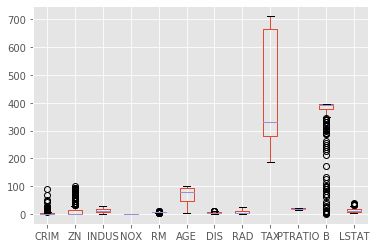

In [30]:
X_train.boxplot()

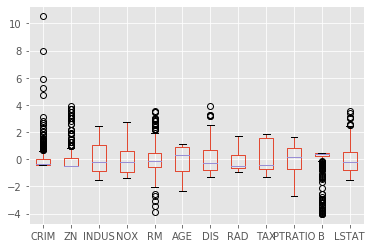

In [31]:
stand = pd.DataFrame(X_train_stand, columns = X_train.columns)
stand.boxplot()

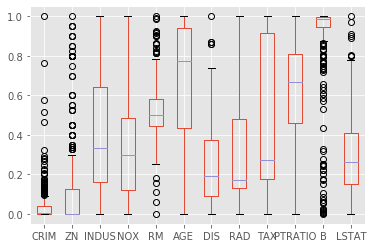

In [32]:
norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
norm.boxplot()

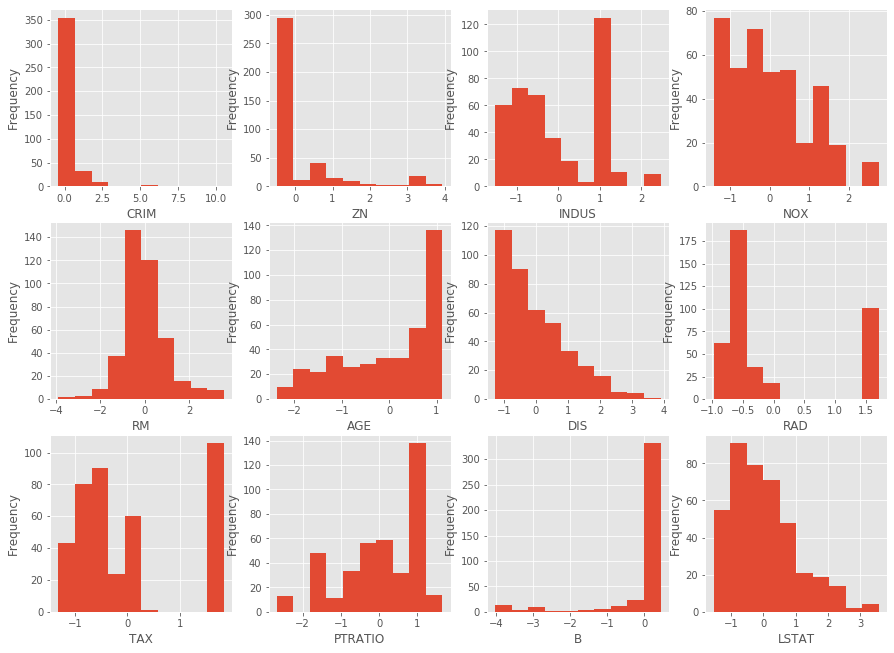

In [33]:
# Check for distribution
plt.figure(figsize = (15,15))
i = 1

for feature in list(stand.columns):
    plt.subplot(4,4,i)
    stand[feature].plot.hist()
    plt.xlabel(feature)
    i += 1

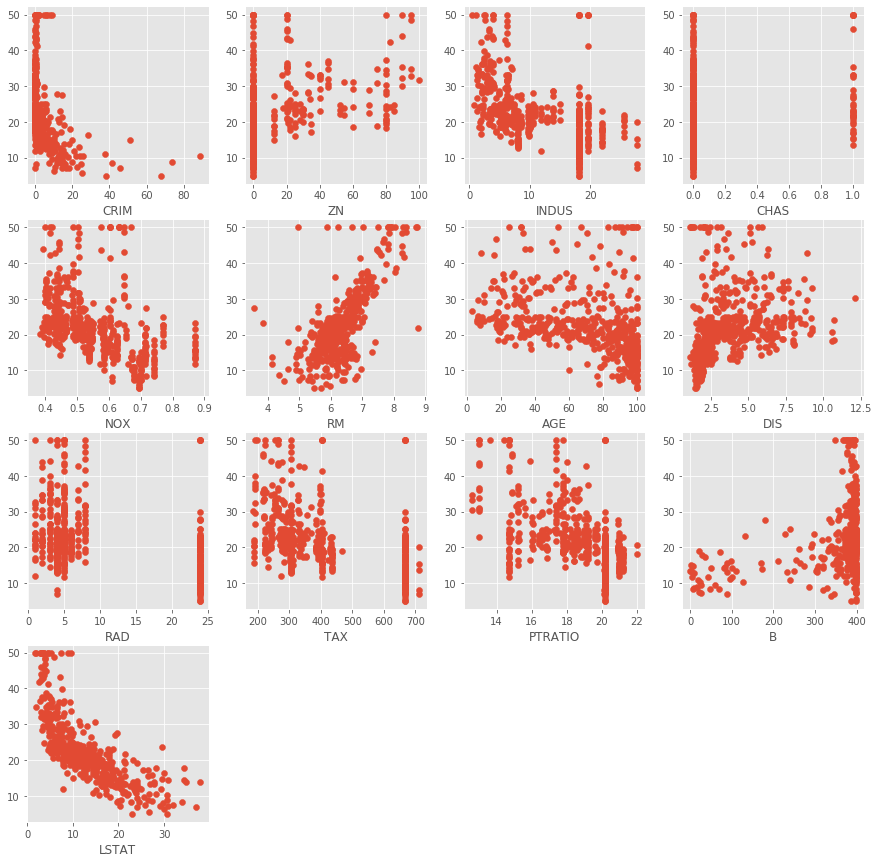

In [44]:
# Check for distribution
plt.figure(figsize = (15,15))
i = 1

for feature in list(boston.feature_names):
    plt.subplot(4,4,i)
    plt.scatter(x = data_boston[feature], y = data_boston['MEDV'])
    plt.xlabel(feature)
    i += 1


In [45]:
data_boston.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [34]:
import statsmodels.api as smf

Xs = X_train
y = y_train
Xs2 = smf.add_constant(Xs)
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     91.68
Date:                Thu, 07 May 2020   Prob (F-statistic):          1.26e-105
Time:                        15:39:06   Log-Likelihood:                -1195.1
No. Observations:                 404   AIC:                             2416.
Df Residuals:                     391   BIC:                             2468.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.3215      5.744      5.627      0.0

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
predict_ = est2.predict(smf.add_constant(X_test))
smf.tools.eval_measures.rmse(predict_, y_test)

# Interpretation: This RMSE is measured in terms of Y. Hence, it means "out prediction will be off by about $5 on average"

5.0260359416070575

In [36]:
import statsmodels.api as smf

Xs = pd.DataFrame(X_train_stand, columns = X_train.columns)
y = y_train.reset_index(drop = True)
Xs2 = smf.add_constant(Xs)
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     91.68
Date:                Thu, 07 May 2020   Prob (F-statistic):          1.26e-105
Time:                        15:43:54   Log-Likelihood:                -1195.1
No. Observations:                 404   AIC:                             2416.
Df Residuals:                     391   BIC:                             2468.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5342      0.236     95.595      0.0

### How to interpret the above coefficients of standardized IVs?

From https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/, 

"A coefficient for a standardized independent variable represent the mean change in the dependent variable given a one standard deviation change in the independent variable. The sign for a standardize variable will match the sign for an un-standardized variable. In your case, the negative sign indicates that as the IV increases the DV tends to decrease–a negative relationship."

In [37]:
predict_stand = est2.predict(smf.add_constant(pd.DataFrame(X_test_stand, columns = X_test.columns)))
smf.tools.eval_measures.rmse(predict_stand, y_test)

5.0260359416070655

In [38]:
import statsmodels.api as smf

Xs = pd.DataFrame(X_train_norm, columns = X_train.columns)
y = y_train.reset_index(drop = True)
Xs2 = smf.add_constant(Xs)
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     91.68
Date:                Thu, 07 May 2020   Prob (F-statistic):          1.26e-105
Time:                        15:43:55   Log-Likelihood:                -1195.1
No. Observations:                 404   AIC:                             2416.
Df Residuals:                     391   BIC:                             2468.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4598      2.680      9.128      0.0

### How to interpret the above coefficients of normalised IVs?

From https://stats.stackexchange.com/questions/306019/in-linear-regression-why-do-we-often-have-to-normalize-independent-variables-pr, 

"the expected change in Y when the predictor X is augmented by one observed range of this variable, all other variables kept equal", where range is the Xmax - Xmin.

### Observation:

After performing standardisation and normalisation, whilst comparing it to a model with no feature engineering being conducted on it, why are the p-values the same? Is this suppose to be expected?

From https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia, the reply by "Macro" suggests that it is expected.

"As @gung alludes to and @MånsT shows explicitly (+1 to both, btw), centering/scaling does not affect your statistical inference in regression models - the **estimates are adjusted appropriately** and the **𝑝-values will be the same.**"

In [39]:
predict_norm = est2.predict(smf.add_constant(pd.DataFrame(X_test_norm, columns = X_test.columns)))
smf.tools.eval_measures.rmse(predict_norm, y_test)

5.026035941607065

In [43]:
X_vif = X.copy()

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
# X = data[['cement_component', 'furnace_slag', 'fly_ash','water_component', 'superplasticizer', 'coarse_aggregate','fine_aggregate', 'age']]
X_vif['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# View results using print
print(vif)

    variables         VIF
0        CRIM    1.787705
1          ZN    2.298257
2       INDUS    3.949246
3         NOX    4.388775
4          RM    1.931865
5         AGE    3.092832
6         DIS    3.954961
7         RAD    7.397844
8         TAX    8.876233
9     PTRATIO    1.783302
10          B    1.344971
11      LSTAT    2.931101
12  Intercept  584.833043


# Observations from the 1st round of MLR with all Variables

1. Is the model better off with none of the variables? or with some?
> Based on the F-Statistic test, the null hypothesis of the coefficients of all X variables = zero is rejected due to the >1 F-Statistic. Hence, the P-value is lesser than 0.05, which is why we reject and say that the alternate hypothesis is true - that there is one coefficient of an X variable that is not zero. 

2. Which of the variables are significant? 
> Without any transformations yet, ['AGE', 'INDUS', 'ZN'] are shown to be not significant. The T-Test tests against the following H0 (That the coefficient = 0). Hence, these coefficients are better left to be zero.

3. What are the multicollinear variables in this dataset?
> A safe threshold is a VIF<5 is good (based on the Intro to Stat Learning). ['RAD', 'TAX] are shown to be have a high correlation with every other variable. Before removing them, we'll need to understand which variables are worth taking out. 

4. How is the Model Fit?
> RMSE is ~5 units of Y, and R2 is 0.738 (meaning 73.8% of model's variation is explained by the model)


In [278]:
predict_

427    13.490690
260    35.780817
115    20.618243
398     6.597428
131    19.899610
         ...    
409    19.863777
241    23.755597
65     29.673229
386     6.009672
132    20.544585
Length: 102, dtype: float64

In [279]:
predict_stand

0      13.490690
1      35.780817
2      20.618243
3       6.597428
4      19.899610
         ...    
97     19.863777
98     23.755597
99     29.673229
100     6.009672
101    20.544585
Length: 102, dtype: float64

### Study if the L.I.N.E. Assumptions of a linear regression 

Plots to visualise:
1. Residual v Fitted Values (y hat)
> What to see? a) Random bounces to show a likely linear r/s, b) horizontal bars to show equal variances, c) no one residual standing out to show no outliers
2. Residual v Independent Variables 
> What to see? You want to see the same patterns as you'd see in the above plot. If there lie a plot with a form of pattern, it means that predictor has some relation to the residual and should thus be included into the model.
3. Actual v Predicted Scatter Plot with Reg Line
> What to see? You wanna see a linear line along the same scale as that indicates that your prediction is approximately similar to your actual values.
4. Actual v Predicted Bar Plot / Dist plot
> A bar plot is harder if the number of y_test is big. In such instances, best use the KDE plot.
> What to see? This is similar to plot 3, where you just wanna determine how far off your predicted values are from the actual values.
5. Normal Probability Plots and Histograms of Residuals
> To determine if the residuals are normally distributed.
> Why? Recall that the stochastic part of the model - the error - needs to be randomly distributed (which means following a normal distribution). If it is not randomly distributed, it means that there can be something worth explaining that is not yet explained by the current model; indicating the need to add on more variables or other methods. 

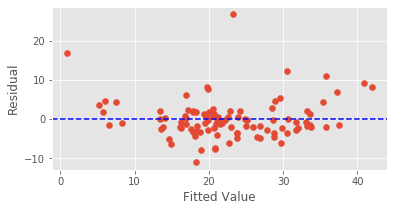

In [81]:
# 1. Residual v Fitted Values (y hat)

residual = y_test - predict_
fig, ax = plt.subplots(figsize=(6,3))
_ = ax.scatter(y = residual, x = predict_)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.axhline(y=0, color='b', linestyle='--')

## observation: there's some outliers where fitted value is 23, 1

In [60]:
for values in X_test.columns:
    print(values)

CRIM
ZN
INDUS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


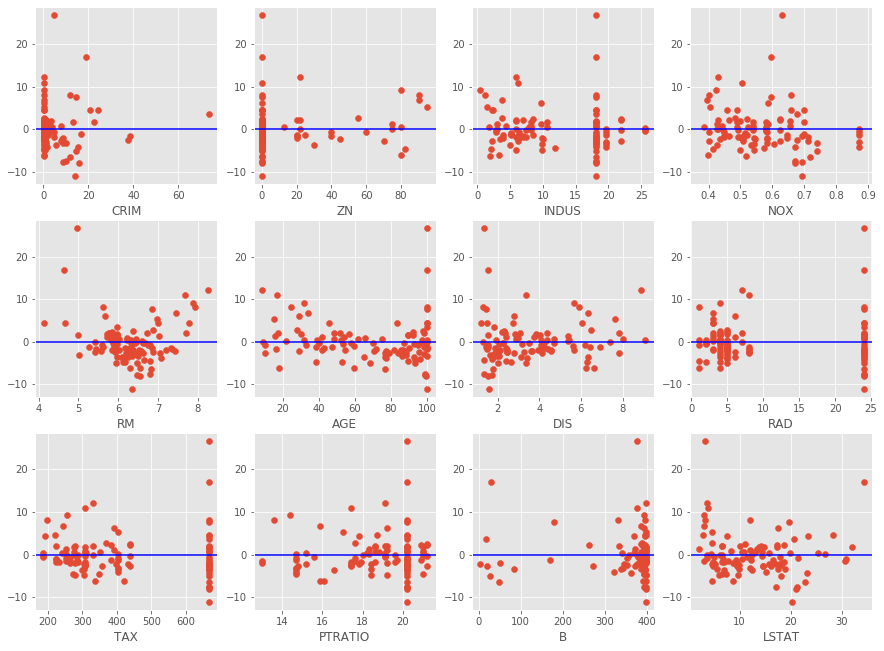

In [82]:
# 2. Residual v Independent Variable of INDUS

plt.figure(figsize = (15,15))
i = 1
 
for values in X_test.columns:
    plt.subplot(4,4,i)
    plt.scatter(y = residual, x = X_test[values])
    plt.xlabel(values)
    plt.axhline(y=0, color='b', linestyle='-')
    i += 1


r =  0.8494078873747323


Text(0, 0.5, 'Y Hat')

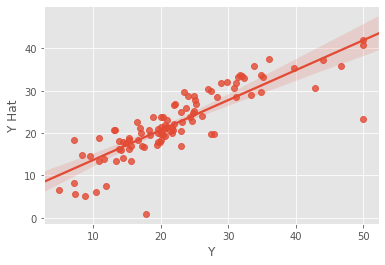

In [83]:
# 3. Actual v Predicted Scatter Plot with Reg Line
print('r = ', np.corrcoef(predict_, y_test)[0][1])

sns.regplot(y = predict_, x = y_test)
plt.xlabel('Y')
plt.ylabel('Y Hat')

## Observation: correlation between the predicted and the actual y is actually not bad, both visually 
## and in their Pearson correlation of 0.849

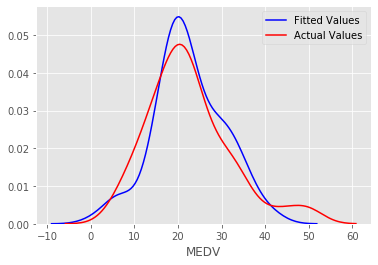

In [84]:
# 4. Actual v Predicted Bar Plot / KDE plot

ax1 = sns.distplot(predict_, hist = False, color = 'b', label = 'Fitted Values')
sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values', ax = ax1)

## observation: Across the scale of actual values, there is no exact 1:1 fit.
## The most common median value tends to be over predicted and mean < x < 41 is
## where the fitted values tend to be more frequent. 
## Interpretation: The model is not that bad. 

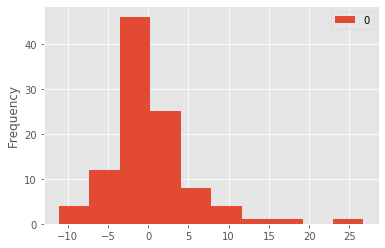

In [85]:
#5. Normal Probability Plots and Histograms of Residuals

pd.DataFrame(residual).plot.hist()

## Observation, the residuals distribution plot is right skewed.
## Hence, the model will need more investigation.

0.8428313796220728


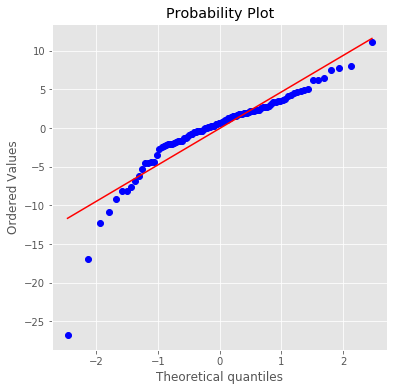

In [80]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
print(r**2)

In [284]:
X.corr()

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
CRIM     1.000000 -0.200469  0.406583  0.420972 -0.219247  0.352734 -0.379670   
ZN      -0.200469  1.000000 -0.533828 -0.516604  0.311991 -0.569537  0.664408   
INDUS    0.406583 -0.533828  1.000000  0.763651 -0.391676  0.644779 -0.708027   
NOX      0.420972 -0.516604  0.763651  1.000000 -0.302188  0.731470 -0.769230   
RM      -0.219247  0.311991 -0.391676 -0.302188  1.000000 -0.240265  0.205246   
AGE      0.352734 -0.569537  0.644779  0.731470 -0.240265  1.000000 -0.747881   
DIS     -0.379670  0.664408 -0.708027 -0.769230  0.205246 -0.747881  1.000000   
RAD      0.625505 -0.311948  0.595129  0.611441 -0.209847  0.456022 -0.494588   
TAX      0.582764 -0.314563  0.720760  0.668023 -0.292048  0.506456 -0.534432   
PTRATIO  0.289946 -0.391679  0.383248  0.188933 -0.355501  0.261515 -0.232471   
B       -0.385064  0.175520 -0.356977 -0.380051  0.128069 -0.273534  0.291512   
LSTAT    0.455621 -0.412995  0.603800  0.590879 -0.613808  0.602339 -0.496996   

              RAD       TAX   PTRATIO         B     LSTAT  
CRIM     0.625505  0.582764  0.289946 -0.385064  0.455621  
ZN      -0.311948 -0.314563 -0.391679  0.175520 -0.412995  
INDUS    0.595129  0.720760  0.383248 -0.356977  0.603800  
NOX      0.611441  0.668023  0.188933 -0.380051  0.590879  
RM      -0.209847 -0.292048 -0.355501  0.128069 -0.613808  
AGE      0.456022  0.506456  0.261515 -0.273534  0.602339  
DIS     -0.494588 -0.534432 -0.232471  0.291512 -0.496996  
RAD      1.000000  0.910228  0.464741 -0.444413  0.488676  
TAX      0.910228  1.000000  0.460853 -0.441808  0.543993  
PTRATIO  0.464741  0.460853  1.000000 -0.177383  0.374044  
B       -0.444413 -0.441808 -0.177383  1.000000 -0.366087  
LSTAT    0.488676  0.543993  0.374044 -0.366087  1.000000

In [286]:
X_vif = X.copy()

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
# X = data[['cement_component', 'furnace_slag', 'fly_ash','water_component', 'superplasticizer', 'coarse_aggregate','fine_aggregate', 'age']]
X_vif['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# View results using print
print(vif)

    variables         VIF
0        CRIM    1.787705
1          ZN    2.298257
2       INDUS    3.949246
3         NOX    4.388775
4          RM    1.931865
5         AGE    3.092832
6         DIS    3.954961
7         RAD    7.397844
8         TAX    8.876233
9     PTRATIO    1.783302
10          B    1.344971
11      LSTAT    2.931101
12  Intercept  584.833043


In [300]:
X_new = X.drop(['TAX','RAD','DIS','NOX','INDUS'], axis = 1)
X_new

CRIM    ZN     RM   AGE  PTRATIO       B  LSTAT
0    0.00632  18.0  6.575  65.2     15.3  396.90   4.98
1    0.02731   0.0  6.421  78.9     17.8  396.90   9.14
2    0.02729   0.0  7.185  61.1     17.8  392.83   4.03
3    0.03237   0.0  6.998  45.8     18.7  394.63   2.94
4    0.06905   0.0  7.147  54.2     18.7  396.90   5.33
..       ...   ...    ...   ...      ...     ...    ...
501  0.06263   0.0  6.593  69.1     21.0  391.99   9.67
502  0.04527   0.0  6.120  76.7     21.0  396.90   9.08
503  0.06076   0.0  6.976  91.0     21.0  396.90   5.64
504  0.10959   0.0  6.794  89.3     21.0  393.45   6.48
505  0.04741   0.0  6.030  80.8     21.0  396.90   7.88

[506 rows x 7 columns]

In [301]:
X_new_vif = X_new.copy()

# Get variables for which to compute VIF and add intercept term
# X = data[['cement_component', 'furnace_slag', 'fly_ash','water_component', 'superplasticizer', 'coarse_aggregate','fine_aggregate', 'age']]
X_new_vif['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_new_vif.columns
vif["VIF"] = [variance_inflation_factor(X_new_vif.values, i) for i in range(X_new_vif.shape[1])]

# View results using print
print(vif)

   variables         VIF
0       CRIM    1.406391
1         ZN    1.680724
2         RM    1.810907
3        AGE    2.130089
4    PTRATIO    1.334985
5          B    1.259328
6      LSTAT    2.858455
7  Intercept  351.492982


In [302]:
X_new.corr()

CRIM        ZN        RM       AGE   PTRATIO         B     LSTAT
CRIM     1.000000 -0.200469 -0.219247  0.352734  0.289946 -0.385064  0.455621
ZN      -0.200469  1.000000  0.311991 -0.569537 -0.391679  0.175520 -0.412995
RM      -0.219247  0.311991  1.000000 -0.240265 -0.355501  0.128069 -0.613808
AGE      0.352734 -0.569537 -0.240265  1.000000  0.261515 -0.273534  0.602339
PTRATIO  0.289946 -0.391679 -0.355501  0.261515  1.000000 -0.177383  0.374044
B       -0.385064  0.175520  0.128069 -0.273534 -0.177383  1.000000 -0.366087
LSTAT    0.455621 -0.412995 -0.613808  0.602339  0.374044 -0.366087  1.000000

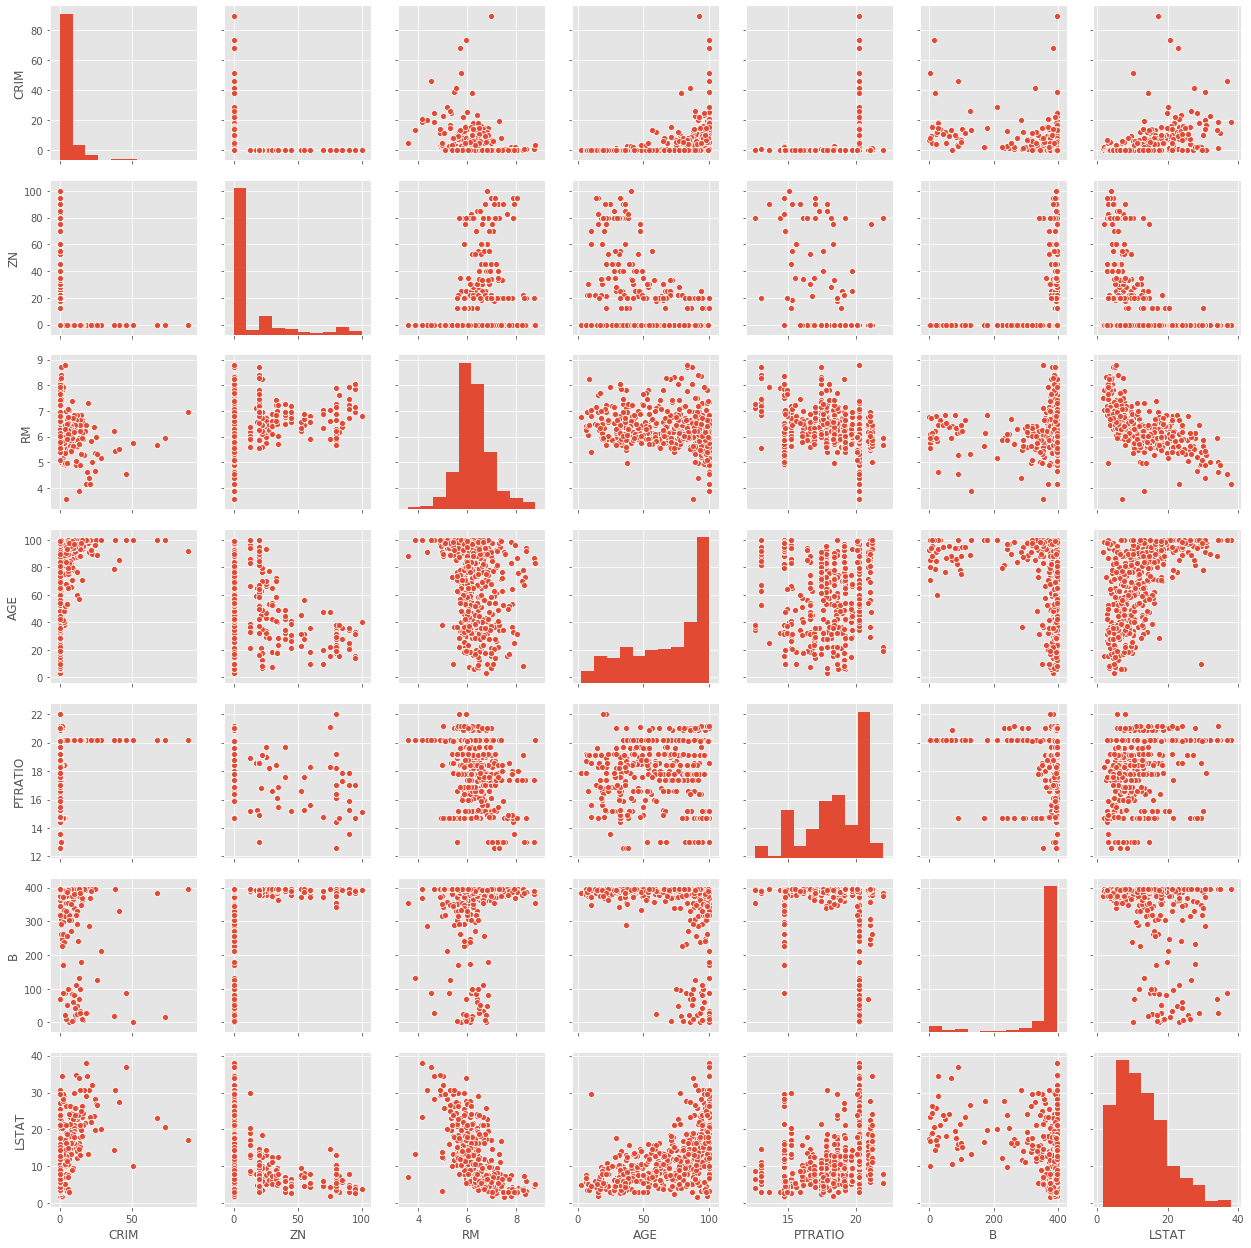

In [312]:
sns.pairplot(X_new)

In [364]:
X_train_new = X_train.drop(['TAX','RAD','DIS','NOX','INDUS','ZN','CRIM'], axis = 1)

In [365]:
import statsmodels.api as smf

Xs = X_train_new
y = y_train
Xs2 = smf.add_constant(Xs)
est = smf.OLS(y, Xs2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     184.9
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.04e-101
Time:                        11:03:26   Log-Likelihood:                -1222.9
No. Observations:                 404   AIC:                             2458.
Df Residuals:                     398   BIC:                             2482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9730      4.697      2.336      0.0

In [366]:
X_test_new = X_test.drop(['TAX','RAD','DIS','NOX','INDUS','ZN','CRIM'], axis = 1)
predict_ = est2.predict(smf.add_constant(X_test_new))
smf.tools.eval_measures.rmse(predict_, y_test)

5.61750362303494

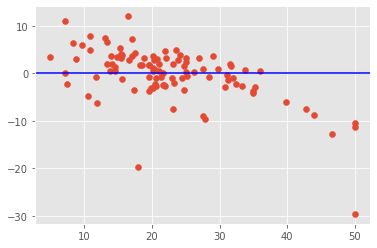

In [367]:
residual = predict_ - y_test
plt.scatter(y = residual, x = y_test)
plt.axhline(y=0, color='b', linestyle='-')

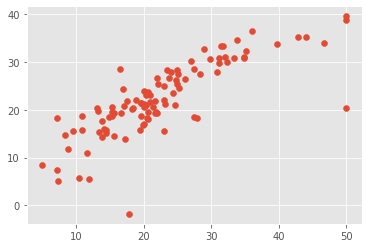

In [372]:
plt.scatter(y = predict_, x = y_test)


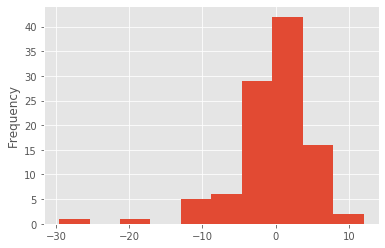

In [368]:
residual.plot.hist()

0.8541218343052241


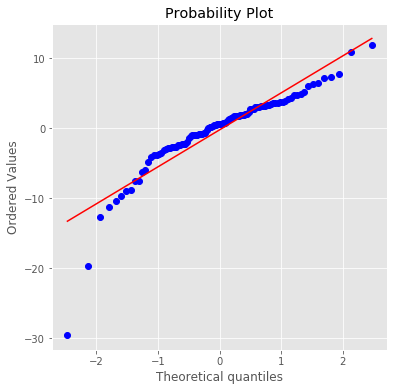

In [375]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
print(r**2)

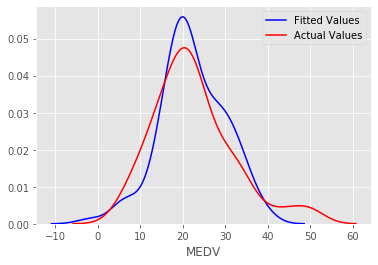

In [370]:
ax1 = sns.distplot(predict_, hist = False, color = 'b', label = 'Fitted Values')
sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values', ax = ax1)

In [328]:
from scipy import stats

stats.normaltest(residual)

NormaltestResult(statistic=59.74740916151421, pvalue=1.0617320968738604e-13)

In [81]:
X = X.values
type(X)

numpy.ndarray

In [82]:
y = y.values
type(y)

numpy.ndarray

In [87]:
y = y.reshape(-1,1)
type(y)

numpy.ndarray

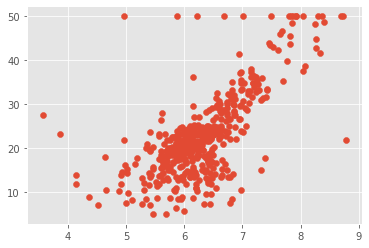

In [89]:
plt.scatter(data_boston['RM'], data_boston['MEDV'])
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(np.array(data_boston['RM']).reshape(-1,1), np.array(data_boston['MEDV']).reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
prediction_space = np.linspace(min(data_boston['RM']), max(data_boston['RM']))
prediction_space = prediction_space.reshape(-1,1)

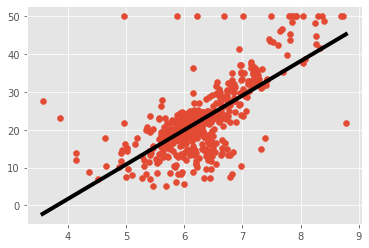

In [108]:
plt.scatter(data_boston['RM'], data_boston['MEDV'])
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 4)
plt.show()

In [110]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])